# PRABAL GHOSH
## Deep Learning Lab =  Sequence to Sequence (seq2seq) variable length and Attention and Transformer

# English to Spanish Translation

You must submit a notebook with execution traces and perfectly written corresponding to the course on Seq2Seq, Seq2Seq with Attention and Transformer architectures. This notebook will identify at least 5 sections:
- Introduction: presentation of the problem and how to proceed
- Data pre-processing
- Seq2Seq architecture
- Seq2Seq architecture with Attention (specify which attention model you used)
- Transformer-based architecture
- Use of a model from huggingface.co (transfer learning) to address the same problem (optional)
- Conclusion: comparison of approaches and personal remarks

Submit also a pdf version of your notebook

# Some important links for Sequence to Sequence (seq2seq) variable length and Attention and Transformer


## <font color = green> **Data is dowlnloaded from the following link** </font>  
[https://www.manythings.org/anki/](https://www.manythings.org/anki/)(Tab-delimited Bilingual Sentence Pairs)

**The following tutorial is followed to understand the Sequence to Sequence and attention and Transformer, Bert**

- "https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html" (basics+attention part)
- "https://towardsdatascience.com/classic-seq2seq-model-vs-seq2seq-model-with-attention-31527c77b28a"
- "https://wikidocs.net/178419"
- "https://www.jeremyjordan.me/attention/"
- "https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/"
- "https://www.tensorflow.org/text/tutorials/transformer"
- "https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html" (A ten-minute introduction to sequence-to-sequence learning in Keras)

**The following youtube videos are good to understand the concepts on Sequence to Sequence and attention and Transformer, Bert**
- "https://www.youtube.com/watch?v=XfpMkf4rD6E"
- "https://www.youtube.com/watch?v=RRP0czWtOeM&list=PLQflnv_s49v-4aH-xFcTykTpcyWSY4Tww&index=5"
- "https://www.youtube.com/watch?v=7gHqxK1o7MU"
- "https://www.youtube.com/watch?v=rj5V6q6-XUM&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=69"
- "https://www.youtube.com/playlist?list=PLH0lCpFdVeJuqQLyYNBlEfRydl2L-CBb"
- "https://www.youtube.com/playlist?list=PL_iWQOsE6TfVmKkQHucjPAoRtIJYt8a5A"


**Transformer implementation coding references to understand**
- "https://www.youtube.com/watch?v=Xg5JG30bYik&list=PLTl9hO2Oobd97qfWC40gOSU8C0iu0m2l4&index=14"
- "https://www.youtube.com/watch?v=5ToW5Hpi8Qc&list=PLbMO9c_jUD46TAokjFxdyGoWvLWaZ3uCE&index=8"
- "https://pylessons.com/transformers-training"
- "https://www.youtube.com/watch?v=81LeULNc2_c&list=PLyFpZIg7OtNQHbWjyy_QApMOHhqvzS-9o&index=4"
- "https://pylessons.com/transformers-introduction"
- "https://pylessons.com/build-transformer"
- "https://keras.io/examples/nlp/neural_machine_translation_with_transformer/"
- "https://machinelearningmastery.com/building-transformer-models-with-attention-crash-course-build-a-neural-machine-translator-in-12-days/"
- "https://www.scaler.com/topics/keras/neural-machine-translation-model-in-keras/"
- "https://www.kaggle.com/code/sani84/transformers-language-translator-eng-to-french"
- "https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/transformer.ipynb?hl=fr"
- "https://www.tensorflow.org/text/tutorials/transformer?hl=fr"
- "https://nlp.seas.harvard.edu/2018/04/03/attention.html"
- "

# Normal Sequence to Sequence (seq2seq)

## import libraries

<img  src="https://www.jeremyjordan.me/content/images/size/w1600/2023/02/path-length-1-2.png" />



<video controls src="https://lena-voita.github.io/resources/lectures/seq2seq/general/seq2seq_training_with_target.mp4" />  

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd


In [2]:
import tensorflow as tf
import keras
import unicodedata
import re
import os
import io
import time

In [3]:
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [4]:
import unicodedata
import re
import numpy as np
import pandas as pd
import os
import io
import time

import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Data Preprocessing

The data is available here: http://www.manythings.org/anki/.
They consist of a set of pairs in the following format:

  `hi .`  `hola .`

There are a variety of languages available, English-Spanish data will be used.

The processing of the data will consist of the following steps:

1. Removal of special characters
1. adding a start or end token to each sentence.
1. Creating the vectorizer for each of the two languages

**Limit the number of examples is 10000 for faster processing**


In [5]:
import pandas as pd  # Import pandas library for data manipulation
import re  # Import re library for regular expressions
import unicodedata  # Import unicodedata library for handling Unicode characters

# Load dataset from file
dataset = 'C:/Users/praba\Documents/GitHub/deep_learning_uca_2/spa-eng/spa.txt'
data = pd.read_table(dataset)  # Read data from file into a DataFrame

# Extract source (X) and target (y) sentences from the DataFrame
X = data.iloc[:, 0]  # Extract the first column as source sentences
y = data.iloc[:, 1]  # Extract the second column as target sentences

# Limit the number of examples for faster processing
X = X[:10000]  # Limit the number of source sentences to 10000
y = y[:10000]  # Limit the number of target sentences to 10000

# Define a function to preprocess a sentence
def step1(sent):
    # Function to preprocess a sentence
    def unicode_to_ascii(s):
        # Normalize Unicode characters and remove accents
        return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

    # Convert the sentence to lowercase and remove leading/trailing whitespaces
    sent = unicode_to_ascii(sent.lower().strip())

    # Add spaces between words and punctuation
    sent = re.sub(r"([?.!,¿])", r" \1 ", sent)
    sent = re.sub(r'[" "]+', " ", sent)

    # Replace everything except letters, punctuation, and some special characters with spaces
    sent = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sent)

    # Add <start> and <end> tokens to the sentence
    return '<start> ' + sent.strip() + ' <end>'

# Apply the preprocessing function to each source and target sentence
X_processed = X.apply(step1)  # Preprocess source sentences
y_processed = y.apply(step1)  # Preprocess target sentences

# Print the first few preprocessed sentences to check
print(X_processed.head())
print(y_processed.head())


0     <start> go . <end>
1     <start> go . <end>
2     <start> go . <end>
3     <start> hi . <end>
4    <start> run ! <end>
Name: Go., dtype: object
0      <start> vete . <end>
1      <start> vaya . <end>
2    <start> vayase . <end>
3      <start> hola . <end>
4     <start> corre ! <end>
Name: Ve., dtype: object


In [6]:
# data.iloc[:500, [0, 1]]

In [7]:
# data.iloc[:, 0]

In [8]:
english_sentences = X_processed_array = np.array(X_processed)
spanish_sentences = y_processed_array = np.array(y_processed)
X_processed_array.shape, y_processed.shape   

((10000,), (10000,))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_array, y_processed_array, test_size=0.33, random_state=42)


In [10]:
y_processed_array[1]

'<start> vaya . <end>'

In [11]:
X_processed_array[1]

'<start> go . <end>'

In [12]:
# X_train

In [13]:
# y_train

In [14]:
# Search vocabulary and max_length for each language
def voc(lang):
    # a list of sentences in the same language
    lengths = [len(txt.split()) for txt in lang]
    vocab = set([w for txt in lang for w in txt.split()])  

    return max(lengths), list(vocab), len(vocab)+2 # for padding and OOV

max_length_spanish, vocab_spanish, vocab_size_spanish = voc(y_processed_array)
max_length_english, vocab_english, vocab_size_english = voc(X_processed_array)

In [15]:
# vocab_english

In [16]:
max_length_spanish,max_length_english

(13, 8)

In [17]:
vocab_size_spanish,vocab_size_english

(4576, 2206)

In [18]:
# Build vectorizer layer
english_vectorizer = layers.TextVectorization(standardize=None, output_mode='int',
                                              vocabulary=vocab_english,
                                              name="English_vect")
# On peut connaitre le vocabulaire par english_vectorizer.get_vocabulary()

# Do the same for spanish
spanish_vectorizer = layers.TextVectorization(standardize=None, output_mode='int',
                                              vocabulary=vocab_spanish,
                                              name="Spanish_vect")

In [19]:
BATCH_SIZE = 32
embedding_dim = 100
latent_dim = 64
dropout=0.2


In [20]:
# spanish_embedded_data = spanish_vectorizer(y_processed_array)
english_embedded_data = english_vectorizer(X_processed_array) 
english_embedded_data[1]

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 294,  582, 1181, 1842,    0,    0,    0,    0], dtype=int64)>

In [21]:
y_processed_array

array(['<start> vete . <end>', '<start> vaya . <end>',
       '<start> vayase . <end>', ..., '<start> cocine la cena . <end>',
       '<start> no me podia mover . <end>',
       '<start> no podria parar . <end>'], dtype=object)

In [22]:
# Prepare training data with teacher forcing
# decoder_input_data is a 2D array of shape (None, None) containing a tokenization of the English sentences.
# decoder_target_data is the same as decoder_input_data but offset by one timestep. decoder_target_data[:, t] will be the same as decoder_input_data[:, t-1].

# english_teacher_enc = english_vectorizer(X_processed_array) #.numpy() # Teacher
spanish_teacher_enc  = spanish_vectorizer(y_processed_array) #.numpy() # Teacher

spanish_target_enc = np.zeros_like(spanish_teacher_enc)
spanish_target_enc[:,:-1] = spanish_teacher_enc[:,1:] # To predict


spanish_target_enc.shape


# english_teacher_enc = english_vectorizer(X_processed_array) #.numpy() # Teacher
# english_target_enc = np.zeros_like(english_teacher_enc)
# english_target_enc[:,:-1] = english_teacher_enc[:,1:] # To predict
# english_target_enc.shape

(10000, 13)

## basic model

**Encoder part**

In [23]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense

# Define an input sequence and process it.
encoder_inputs = Input(shape=(None,),name="english_input")
# encoder_inputs = Input(shape=(None,),dtype=tf.string, name="spanish_input")

# encoder_vectorizer = spanish_vectorizer(encoder_inputs)
# layer_embedding = layers.Embedding(vocab_size_spanish, embedding_dim, name="sp_embedding")

layer_embedding = layers.Embedding(vocab_size_english, embedding_dim, name="en_embedding")
embedding_layer_final = layer_embedding(encoder_inputs)
layer_lstm = LSTM(latent_dim, return_sequences=False, return_state=True)
# _, enc_state_h, enc_state_c = LSTM(latent_dim,  return_sequences=False,return_state=True,
#                                    dropout=dropout, recurrent_dropout=dropout, name="encoder")(embedding_layer_final)

enc_state_output, enc_state_h, enc_state_c = layer_lstm(embedding_layer_final)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [enc_state_h, enc_state_c]



In [24]:
enc_state_output.shape, enc_state_h.shape, enc_state_c.shape

((None, 64), (None, 64), (None, 64))

**Decoder part**

In [25]:
# decoder_inputs = Input(shape=(None,), dtype=tf.int32, name="english_teacher")
decoder_inputs = Input(shape=(None,), name="spanish_teacher")

layer_embedding_decoder = layers.Embedding(vocab_size_spanish, embedding_dim
                     ,name="spanish_embedding")
x =layer_embedding_decoder(decoder_inputs)
decoder_lstm = layers.LSTM(latent_dim, return_sequences=True, return_state=True,
#                            dropout=dropout, recurrent_dropout=dropout, name="decoder1")
                          )
                           
decoder_outputs, _, _ = decoder_lstm(x, initial_state=encoder_states)
decoder_dense = layers.Dense(vocab_size_spanish, activation='softmax')
decoder_outputs_final = decoder_dense(decoder_outputs)


In [26]:
# decoder_lstm.output_shape
decoder_outputs.shape


(None, None, 64)

In [27]:
# Define the model
model1 = Model([encoder_inputs, decoder_inputs], decoder_outputs_final)

In [28]:
model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ english_input       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spanish_teacher     │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ en_embedding        │ (None, None, 100) │    220,600 │ english_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spanish_embedding   │ (None, None, 100) │    457,600 │ spanish_teacher[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 64),      │     42,240 │ en_embedding[0][… │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, None,     │     42,240 │ spanish_embeddin… │
│                     │ 64), (None, 64),  │            │ lstm[0][1],       │
│                     │ (None, 64)]       │            │ lstm[0][2]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, None,      │    297,440 │ lstm_1[0][0]      │
│                     │ 4576)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,060,120 (4.04 MB)

 Trainable params: 1,060,120 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


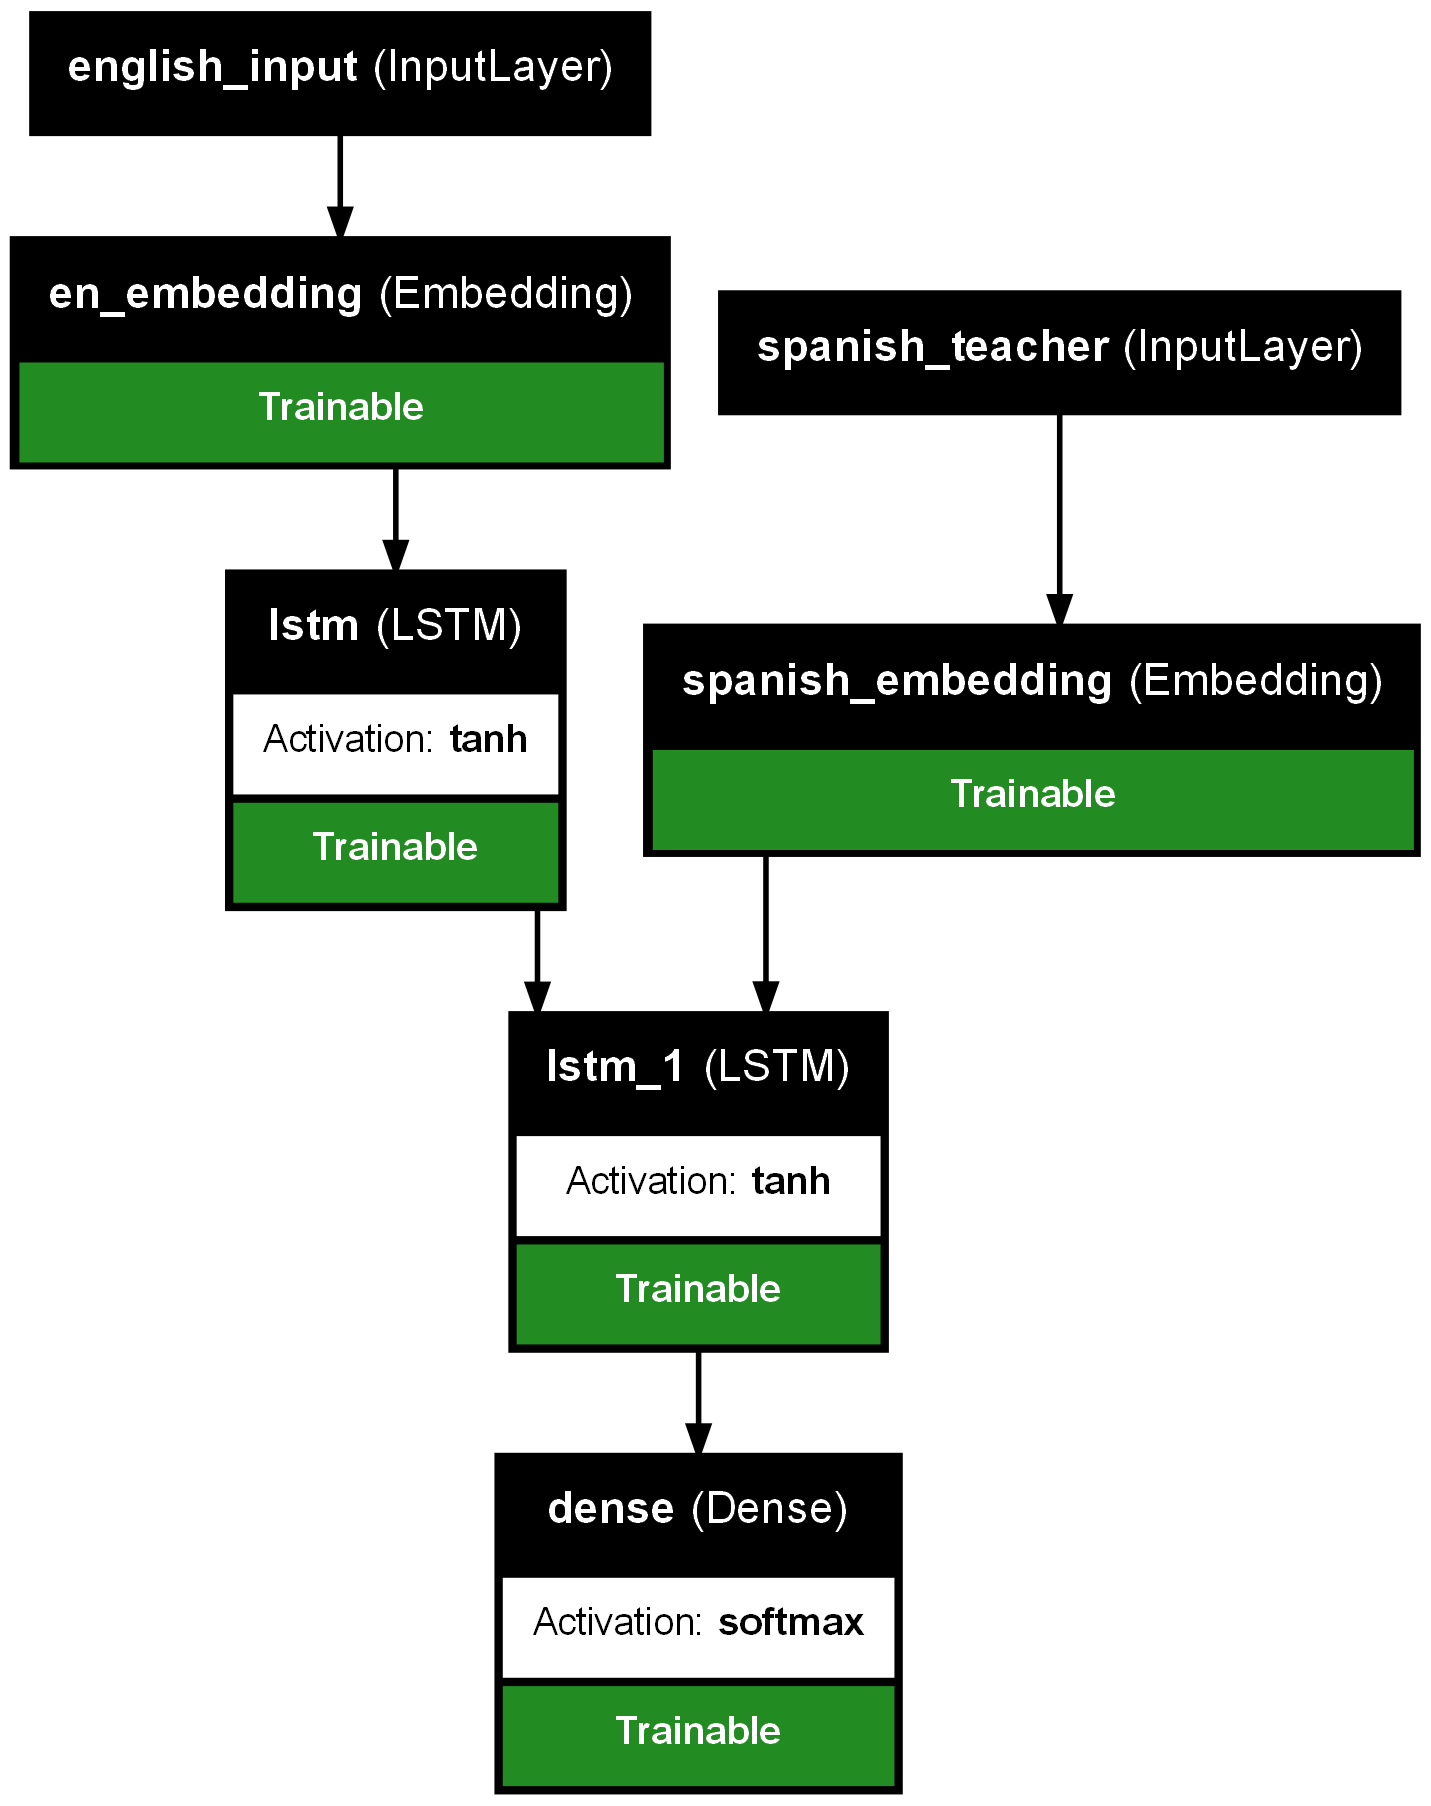

In [30]:
# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model


plot_model(model1, to_file='model_plot.png',
    show_shapes=False,
    show_layer_names=True,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True)

In [31]:
# # spanish_embedded_data = spanish_vectorizer(y_processed_array)
# english_embedded_data = english_vectorizer(X_processed_array) 
# english_embedded_data[1]

In [32]:
# y_processed_array

In [33]:
# # Prepare training data with teacher forcing
# # decoder_input_data is a 2D array of shape (None, None) containing a tokenization of the English sentences.
# # decoder_target_data is the same as decoder_input_data but offset by one timestep. decoder_target_data[:, t] will be the same as decoder_input_data[:, t-1].

# # english_teacher_enc = english_vectorizer(X_processed_array) #.numpy() # Teacher
# spanish_teacher_enc  = spanish_vectorizer(y_processed_array) #.numpy() # Teacher

# spanish_target_enc = np.zeros_like(spanish_teacher_enc)
# spanish_target_enc[:,:-1] = spanish_teacher_enc[:,1:] # To predict


# # spanish_target_enc.shape


# # english_teacher_enc = english_vectorizer(X_processed_array) #.numpy() # Teacher
# # english_target_enc = np.zeros_like(english_teacher_enc)
# # english_target_enc[:,:-1] = english_teacher_enc[:,1:] # To predict
# # english_target_enc.shape

In [34]:
# spanish_teacher_enc

In [35]:
# spanish_target_enc.shape

In [36]:
# Configure the model and start training
# Stop training with early stopping with patience of 20
# callbacks_list = [EarlyStopping(monitor='loss', mode='min', min_delta=0.000001,
#                                 patience=3, restore_best_weights=True, verbose=1,
#                                 )]


# history = model1.fit([y_processed_array, english_teacher_enc], english_target_enc,
#                     validation_split=0.1,
#                     epochs=5, batch_size=BATCH_SIZE,
#                     callbacks=callbacks_list,
#                     verbose=1)



history = model1.fit([english_embedded_data, spanish_teacher_enc], spanish_target_enc,
                    validation_split=0.1,
                    epochs=50, batch_size=BATCH_SIZE,
                    verbose=1)


Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.6270 - loss: 4.2983 - val_accuracy: 0.7124 - val_loss: 2.0023
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7790 - loss: 1.5847 - val_accuracy: 0.7373 - val_loss: 1.8119
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.7812 - loss: 1.4810 - val_accuracy: 0.7388 - val_loss: 1.7619
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7850 - loss: 1.4275 - val_accuracy: 0.7605 - val_loss: 1.6893
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.7954 - loss: 1.3577 - val_accuracy: 0.7651 - val_loss: 1.6639
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8003 - loss: 1.3228 - val_accuracy: 0.7725 - val_loss: 1.6159
Epoch 7/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.8061 - loss: 1.2857 - val_accuracy: 0.7738 - val_loss: 1.5941
Epoch 8/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8131 - loss: 1.2423 - 

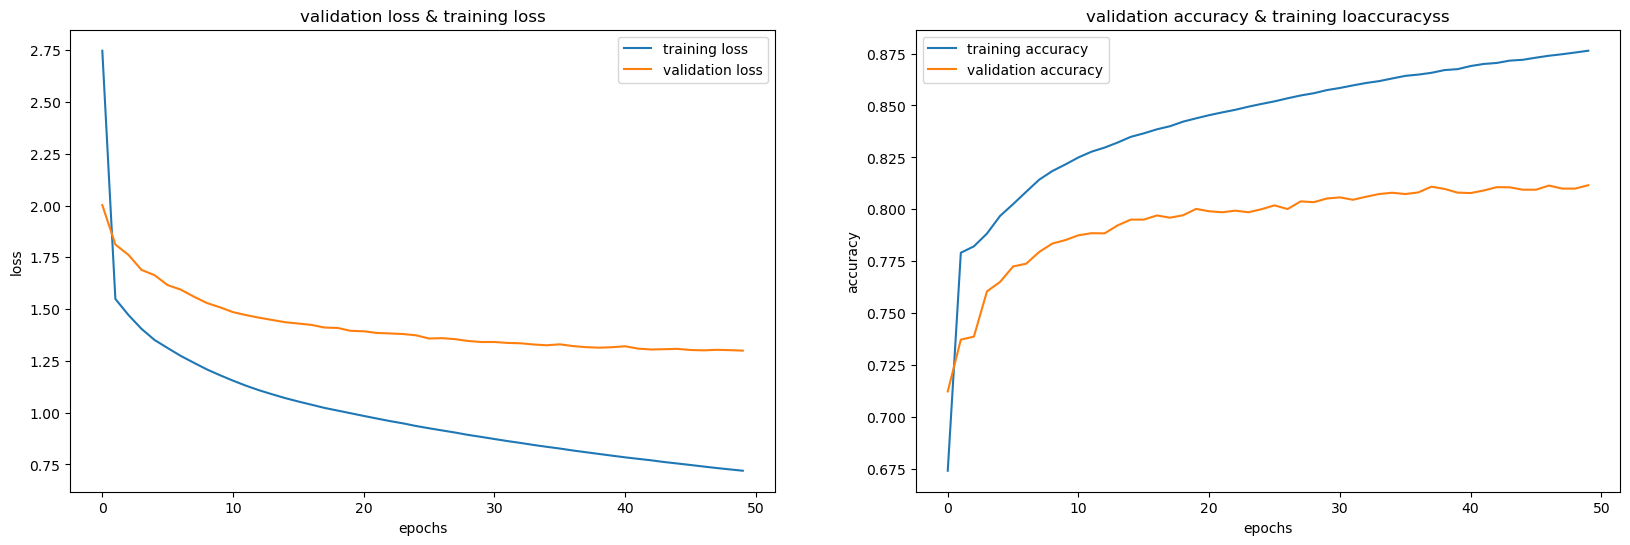

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
# Plot the first subplot  loss)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("validation loss & training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(["training loss", "validation loss"],loc ="upper right"); 

# Plot the second subplot ( accuracy)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("validation accuracy & training loaccuracyss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
leg = plt.legend(["training accuracy", "validation accuracy"],loc ="upper left"); 

plt.show()


### prediction 

In [38]:
# y_pred=model1.predict([spanish_embedded_data, english_teacher_enc])
y_pred=model1.predict([english_embedded_data, spanish_teacher_enc])

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step


In [39]:
y_pred.shape

(10000, 13, 4576)

In [40]:
# y_pred[1]

In [41]:
# Pour décoder, il faut transformer un entier en mot.
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n :
            return word
    return None
    

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Now you can use the Tokenizer class
# tokenizer = Tokenizer()

def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer



In [43]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Selecting data from the first two columns
first_two_columns_data = data.iloc[:, :2]

# Convert the selected data into a NumPy array
fra_eng = np.array(first_two_columns_data.values)

# print("Array Data:")
# print(array_data)


In [44]:
eng_tokenizer = tokenization(fra_eng[:,0])

In [45]:
def get_word(index, tokenizer):
    word = None
    for word, idx in tokenizer.word_index.items():
        if idx == index:
            return word
    return word


In [46]:
# preds_text = []

# for i in y_pred:
#     temp = []
#     for j in range(len(i)):
#         t = get_word(i[j], eng_tokenizer)
#         if j>0:
#             if (t ==get_word(i[j-1],eng_tokenizer ) or (t ==  None)):
#                 temp.append("")
#             else:
#                 temp.append(t)
#         else:
#             if(t == None):
#                 temp.append("")
#             else:
#                 temp.append(t)
#     preds_text.append("".join(temp))
                

In [47]:
# pred_df = pd.DataFrame({"actual":data.iloc[:1000, 0], "predicted": preds_text})

##  basic model -2

**ENCODER**

In [48]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense

# Define an input sequence and process it.
encoder_inputs = Input(shape=(None,))
layer_embedding = layers.Embedding(vocab_size_english, embedding_dim)
embedding_layer_final = layer_embedding(encoder_inputs)

encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(embedding_layer_final)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]



**DECODER**

In [49]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the 
# return states in the training model, but we will use them in inference.

layer_embedding_decoder = layers.Embedding(vocab_size_spanish, embedding_dim)
x =layer_embedding_decoder(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(x,
                                     initial_state=encoder_states)
decoder_dense = Dense(vocab_size_spanish, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model_encoder_training = Model([encoder_inputs, decoder_inputs], decoder_outputs, name="model_encoder_training")

In [50]:
model_encoder_training.summary()

Model: "model_encoder_training"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, None, 100) │    220,600 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 100) │    457,600 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 64),      │     42,240 │ embedding[0][0]   │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, None,     │     42,240 │ embedding_1[0][0… │
│                     │ 64), (None, 64),  │            │ lstm_2[0][1],     │
│                     │ (None, 64)]       │            │ lstm_2[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, None,      │    297,440 │ lstm_3[0][0]      │
│                     │ 4576)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,060,120 (4.04 MB)

 Trainable params: 1,060,120 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

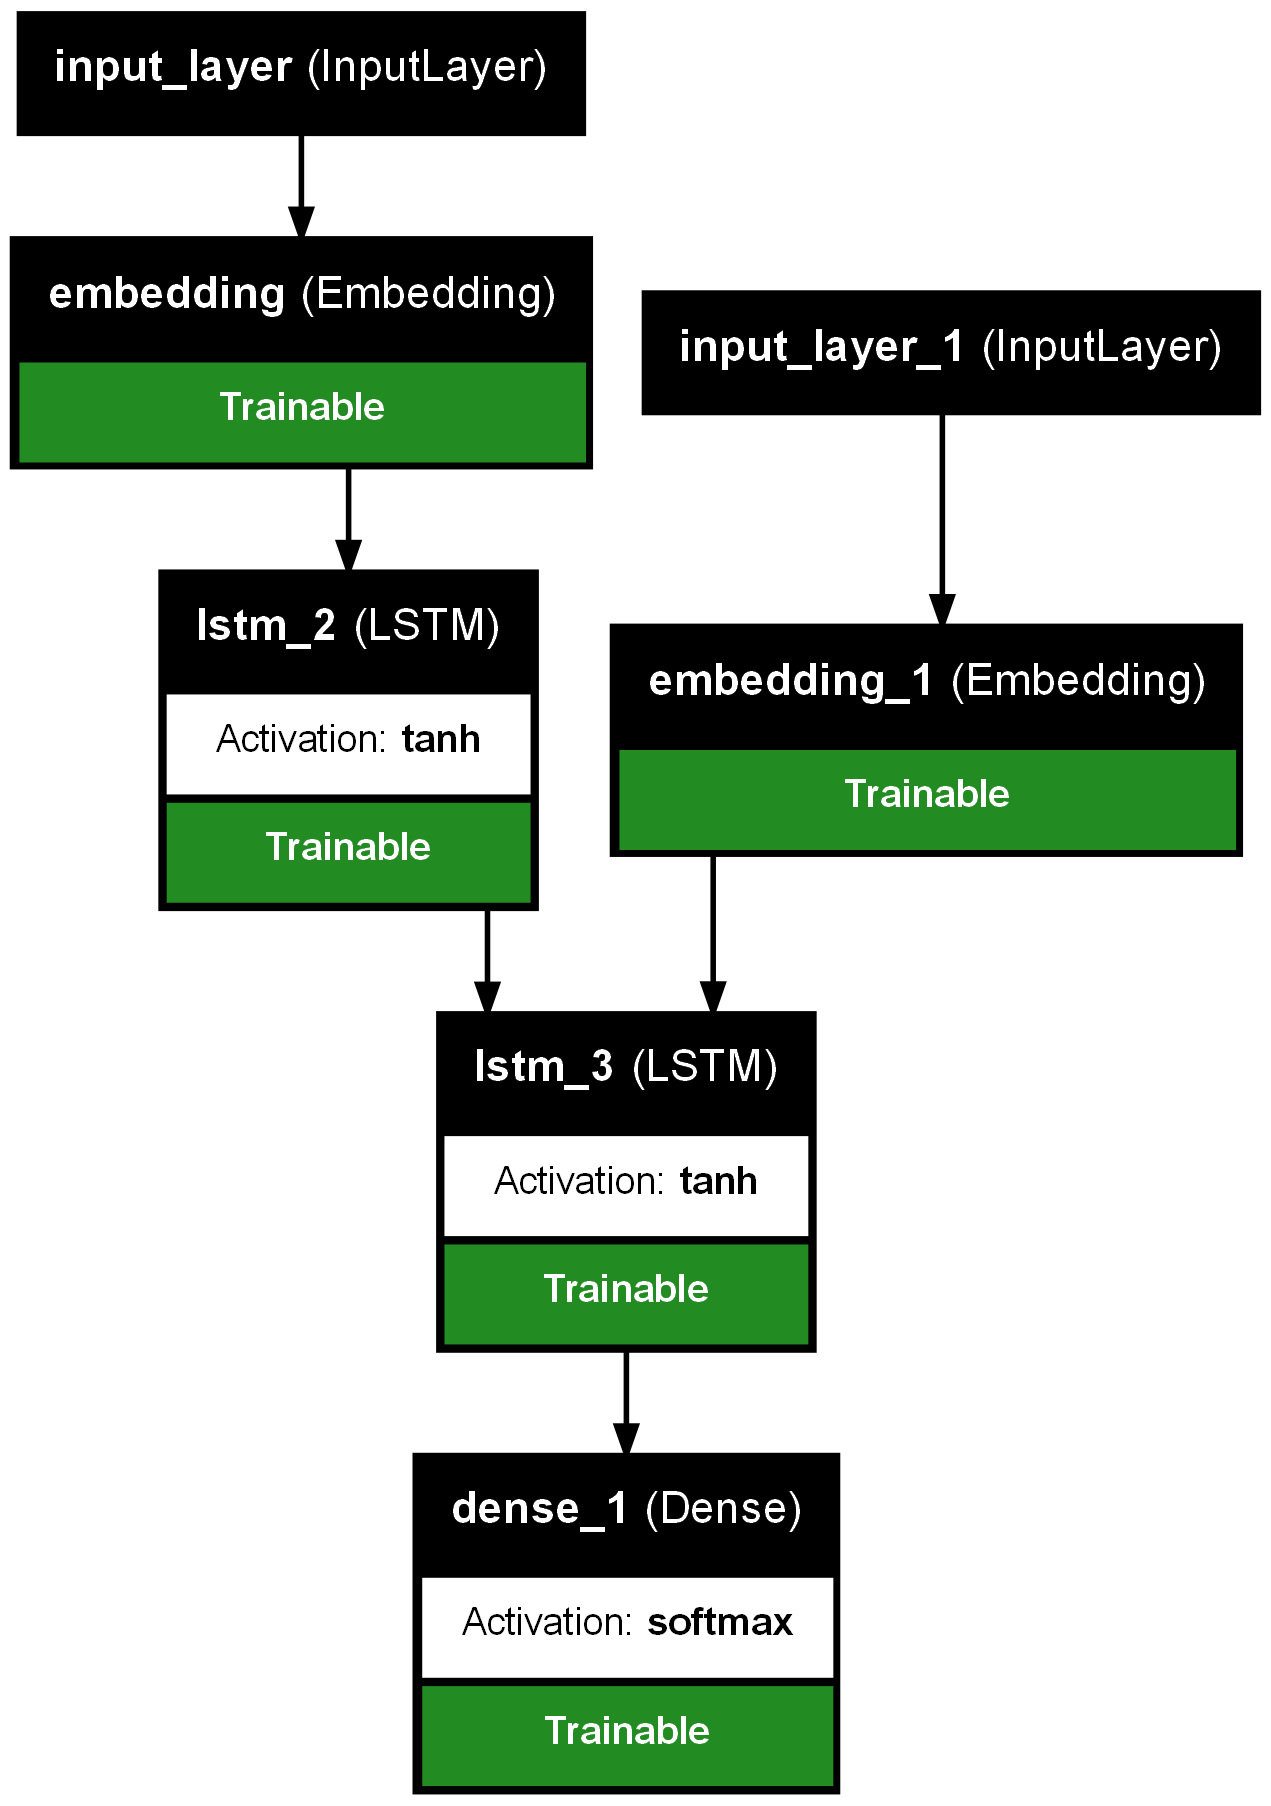

In [51]:
# from tensorflow.keras.utils import plot_model

# plot_model(model_encoder_training, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)


# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model


plot_model(model_encoder_training, to_file='model_plot2.png',
    show_shapes=False,
    show_layer_names=True,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True)

In [52]:
# Run training
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy')


model_encoder_training.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])



In [53]:
# spanish_embedded_data_test = spanish_vectorizer(y_test)
# english_teacher_enc_test = english_vectorizer(X_test)

In [54]:
# Configure the model and start training
# Stop training with early stopping with patience of 20
callbacks_list = [EarlyStopping(monitor='loss', mode='min', min_delta=0.000001,
                                patience=3, restore_best_weights=True, verbose=1,
                                )]


# history = model1.fit([y_processed_array, english_teacher_enc], english_target_enc,
#                     validation_split=0.1,
#                     epochs=5, batch_size=BATCH_SIZE,
#                     callbacks=callbacks_list,
#                     verbose=1)



# history = model_encoder_training.fit([spanish_embedded_data, english_teacher_enc], english_target_enc,
#                     validation_split=0.1,
#                     epochs=50, batch_size=BATCH_SIZE,
#                     callbacks=callbacks_list,
#                     verbose=1)

history = model_encoder_training.fit([english_embedded_data, spanish_teacher_enc], spanish_target_enc,
                    validation_split=0.1,
                    epochs=50, batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=1)

Epoch 1/50


282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.6260 - loss: 4.3051 - val_accuracy: 0.7136 - val_loss: 1.9828
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.7780 - loss: 1.5831 - val_accuracy: 0.7361 - val_loss: 1.8388
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.7817 - loss: 1.4766 - val_accuracy: 0.7560 - val_loss: 1.7485
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7914 - loss: 1.4120 - val_accuracy: 0.7608 - val_loss: 1.6904
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.7956 - loss: 1.3561 - val_accuracy: 0.7625 - val_loss: 1.6597
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.8030 - loss: 1.3124 - val_accuracy: 0.7708 - val_loss: 1.6122
Epoch 7/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8073 - loss: 1.2806 - val_accuracy: 0.7685 - val_loss: 1.5895
Epoch 8/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8092 - loss: 1.2520 - val_accurac

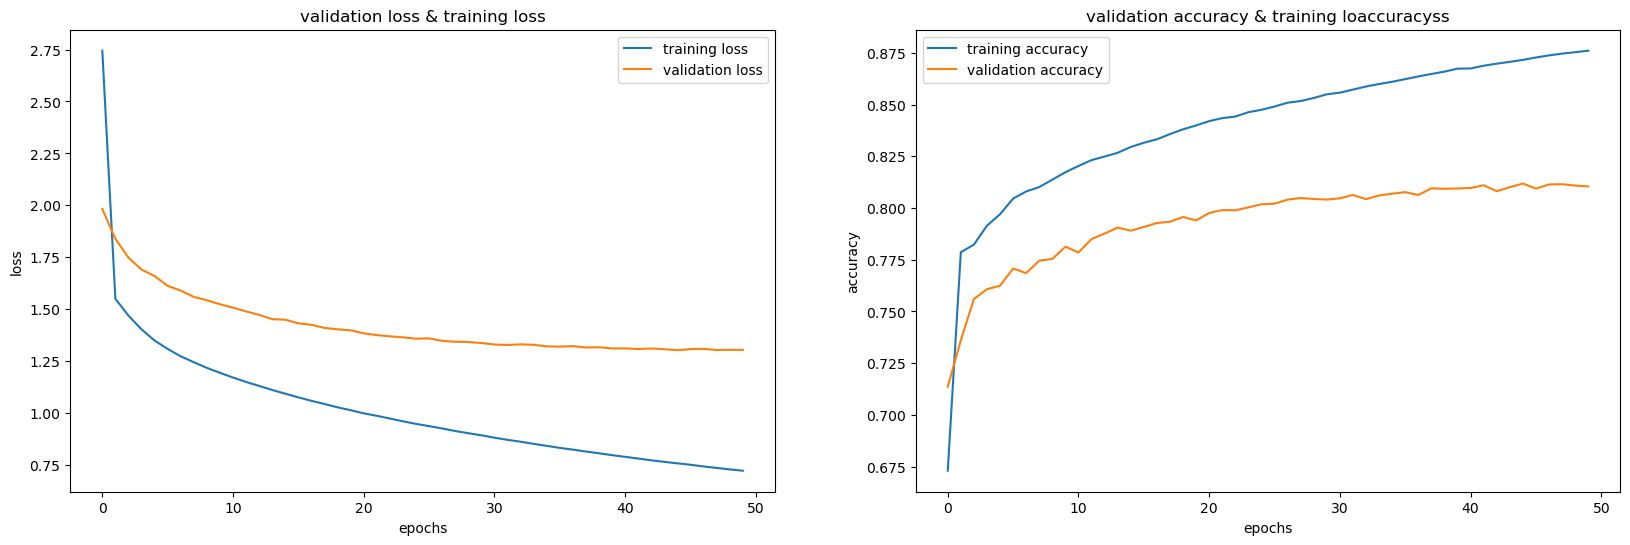

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
# Plot the first subplot  loss)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("validation loss & training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(["training loss", "validation loss"],loc ="upper right"); 

# Plot the second subplot ( accuracy)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("validation accuracy & training loaccuracyss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
leg = plt.legend(["training accuracy", "validation accuracy"],loc ="upper left"); 

plt.show()


## Inference

In [56]:
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

layer_embedding_decoder_inf = layer_embedding_decoder(decoder_inputs)
decoder_outputs, state_h, state_c = decoder_lstm(
    layer_embedding_decoder_inf , initial_state=decoder_states_inputs)


decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [57]:
# def decode_sequence(input_seq):
#     # Encode the input as state vectors.
#     states_value = encoder_model.predict(input_seq)
#     # Iterate over decoded sentence. Target_seq is the input of the decoder
#     target_seq = np.zeros((len(input_seq), 1))
#     target_seq[:, 0] = word2token["<start>"]
#     print(target_seq.shape)
#     output_sequence = [] # Output_sequence is the output of the decoder
#     for _ in range(vocab_size_english):   # vocab_size_english = max_output_length
#         output_value, h, c = decoder_model.predict( [target_seq] + states_value)
#         # Update the target sequence (of length 1) and state
#         target_seq[:, 0] = decode(output_value)
#         states_value = [h, c]
#         # extend output sequence
#         output_sequence += [target_seq]
#     return output_sequence # eventually format i

In [58]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    
    # Initialize target sequence
    target_seq = np.zeros((input_seq.shape[0], 1))  # Assuming input_seq is a NumPy array
    
    # Initialize output sequence
    output_sequence = []
    
    for _ in range(vocab_size_english):  # Assuming max_output_length is defined somewhere
        output_value, h, c = decoder_model.predict([target_seq] + states_value)
        
        # Update the target sequence
        sampled_token_index = np.argmax(output_value, axis=-1)
        target_seq = sampled_token_index.reshape(-1, 1)
        
        # Update states
        states_value = [h, c]
        
        # Append the predicted token to the output sequence
        output_sequence.append(sampled_token_index)
        
    return np.array(output_sequence)  # Convert the output sequence to a NumPy array




In [60]:
# spanish_embedded_data is input sequence
# decoded_sequence = decode_sequence(spanish_embedded_data)

english_test_embedded_data = english_vectorizer(X_test) 

decoded_sequence = decode_sequence(english_test_embedded_data)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
104/104 ━━━━━━━━

In [61]:
decoded_sequence.shape

(2206, 3300, 1)

In [62]:
# from keras.models import Model
# from keras.layers import Input, LSTM, Dense, Embedding

# # Define input shape and parameters
# # vocab_size_spanish = ...
# BATCH_SIZE = 32
# embedding_dim = 100
# latent_dim = 64
# dropout=0.2


# # Encoder
# encoder_inputs = Input(shape=(None,), dtype=tf.int32, name="spanish_input")
# encoder_embedding = Embedding(vocab_size_spanish, embedding_dim, name="sp_embedding")(encoder_inputs)
# encoder_lstm = LSTM(latent_dim, return_sequences=False, return_state=True, dropout=dropout, recurrent_dropout=dropout, name="encoder")
# _, enc_state_h, enc_state_c = encoder_lstm(encoder_embedding)
# encoder_states = [enc_state_h, enc_state_c]

# # Define encoder model
# encoder_model = Model(encoder_inputs, encoder_states)

# # Decoder
# decoder_inputs = Input(shape=(None,), dtype=tf.int32, name="english_teacher")
# decoder_embedding = Embedding(vocab_size_english, embedding_dim, name="english_embedding")(decoder_inputs)
# decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=dropout, recurrent_dropout=dropout, name="decoder")
# decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
# decoder_dense = Dense(vocab_size_english, activation='softmax')
# decoder_outputs_final = decoder_dense(decoder_outputs)

# # Define the model
# model = Model([encoder_inputs, decoder_inputs], decoder_outputs_final)


# Sequence to Sequence Attention

<img  src="https://lena-voita.github.io/resources/lectures/seq2seq/attention/general_scheme-min.png" />


## Method -1.  ( Attention layer is directly imported from keras)
**tf.keras.layers.Attention()**

**ENCODER**

In [63]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
import tensorflow as tf

# Define an input sequence and process it.
# encoder_inputs = Input(shape=(1,), dtype=tf.string, name="spanish_input")
encoder_inputs = Input(shape=(None,), name="english_input")

# encoder_vectorizer = spanish_vectorizer(encoder_inputs)

# enc = layers.Embedding(vocab_size_spanish, embedding_dim, name="sp_embedding")(encoder_vectorizer)

layer_embedding = layers.Embedding(vocab_size_english, embedding_dim)
embedding_layer_final = layer_embedding(encoder_inputs)

enc_state_ouput, enc_state_h, enc_state_c = LSTM(latent_dim,  return_sequences=True, return_state=True,
                                   dropout=dropout, recurrent_dropout=dropout, name="encoder")(embedding_layer_final)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [enc_state_h, enc_state_c]







**DECODER**

In [64]:

decoder_inputs = Input(shape=(None,), name="spanish_teacher")
# decoder_inputs = Input(shape=(None,), dtype=tf.int32, name="english_teacher")
x = layers.Embedding(vocab_size_spanish, embedding_dim, name="spanish_embedding")(decoder_inputs)



# Adding the Attention mechanism

decoder_lstm = layers.LSTM(latent_dim, return_sequences=True, return_state=True,
                           dropout=dropout, recurrent_dropout=dropout, name="Decoder")
decoder_outputs,decoder_state_h, decoder_state_c = decoder_lstm(x, initial_state=encoder_states)

attention = tf.keras.layers.Attention()([decoder_outputs, enc_state_ouput])  # Using the decoder input and encoder output for attention
decoder_combined_context = layers.concatenate([attention, decoder_outputs], name="Luong_Attention")

decoder_dense = layers.Dense(vocab_size_spanish, activation='softmax')
decoder_outputs_final = decoder_dense(attention)

# Define the model
model2 = Model([encoder_inputs, decoder_inputs], decoder_outputs_final)

In [65]:
# x

In [66]:
model2.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ english_input       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spanish_teacher     │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, None, 100) │    220,600 │ english_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spanish_embedding   │ (None, None, 100) │    457,600 │ spanish_teacher[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder (LSTM)      │ [(None, None,     │     42,240 │ embedding_2[0][0] │
│                     │ 64), (None, 64),  │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Decoder (LSTM)      │ [(None, None,     │     42,240 │ spanish_embeddin… │
│                     │ 64), (None, 64),  │            │ encoder[0][1],    │
│                     │ (None, 64)]       │            │ encoder[0][2]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, None, 64)  │          0 │ Decoder[0][0],    │
│ (Attention)         │                   │            │ encoder[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, None,      │    297,440 │ attention[0][0]   │
│                     │ 4576)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,060,120 (4.04 MB)

 Trainable params: 1,060,120 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

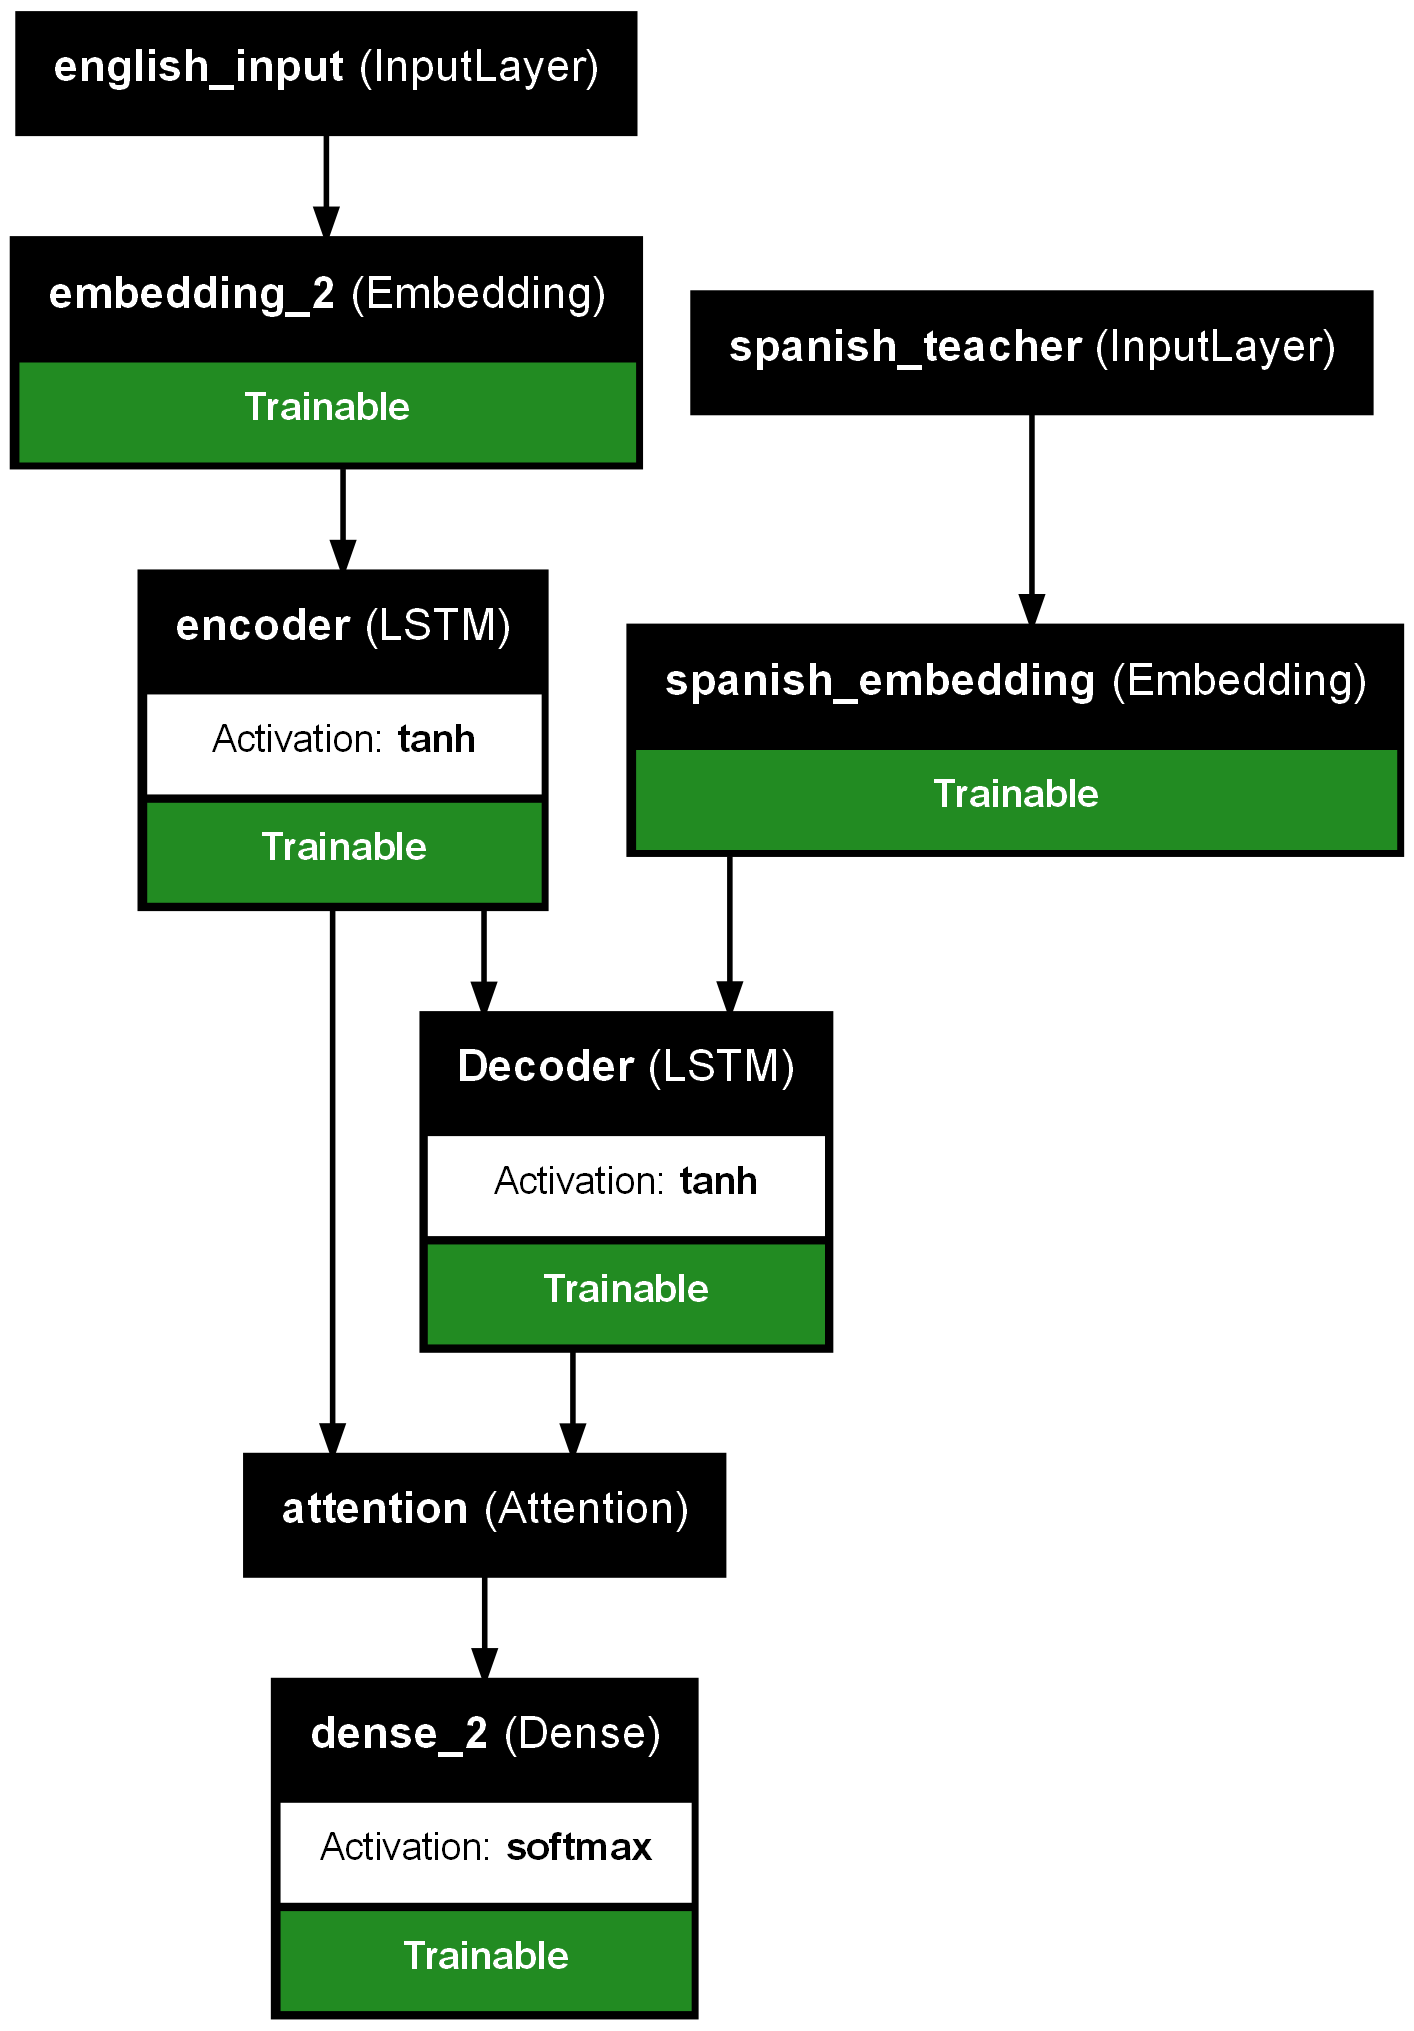

In [67]:
# from tensorflow.keras.utils import plot_model

# plot_model(model2, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)


# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model


plot_model(model2, to_file='model_plot3.png',
    show_shapes=False,
    show_layer_names=True,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True)

In [68]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [69]:
# # Prepare training data with teacher forcing
# # decoder_input_data is a 2D array of shape (None, None) containing a tokenization of the English sentences.
# # decoder_target_data is the same as decoder_input_data but offset by one timestep. decoder_target_data[:, t] will be the same as decoder_input_data[:, t-1].

# english_teacher_enc = english_vectorizer(X_processed_array) #.numpy() # Teacher
# english_target_enc = np.zeros_like(english_teacher_enc)
# english_target_enc[:,:-1] = english_teacher_enc[:,1:] # To predict
# english_target_enc.shape

In [70]:
# Configure the model and start training
# Stop training with early stopping with patience of 20
callbacks_list = [EarlyStopping(monitor='loss', mode='min', min_delta=0.000001,
                                patience=5, restore_best_weights=True, verbose=1,
                                )]


# history = model2.fit([y_processed_array, english_teacher_enc], english_target_enc,
#                     validation_split=0.1,
#                     epochs=10, batch_size=BATCH_SIZE,
#                     callbacks=callbacks_list,
#                     verbose=1)




# history = model2.fit([spanish_embedded_data, english_teacher_enc], english_target_enc,
#                     validation_split=0.1,
#                     epochs=50, batch_size=BATCH_SIZE,
#                     callbacks=callbacks_list,
#                     verbose=1)


history = model2.fit([english_embedded_data, spanish_teacher_enc], spanish_target_enc,
                    validation_split=0.1,
                    epochs=50, batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=1)


Epoch 1/50


282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.6126 - loss: 4.6586 - val_accuracy: 0.5862 - val_loss: 2.8322
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.6291 - loss: 2.4644 - val_accuracy: 0.5862 - val_loss: 2.8363
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.6291 - loss: 2.4605 - val_accuracy: 0.5862 - val_loss: 2.8326
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.6307 - loss: 2.4030 - val_accuracy: 0.6266 - val_loss: 2.3466
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.6907 - loss: 1.9040 - val_accuracy: 0.6408 - val_loss: 2.2738
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.7043 - loss: 1.8211 - val_accuracy: 0.6638 - val_loss: 2.1390
Epoch 7/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.7231 - loss: 1.7156 - val_accuracy: 0.6788 - val_loss: 2.0369
Epoch 8/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.7432 - loss: 1.6458 - val_accurac

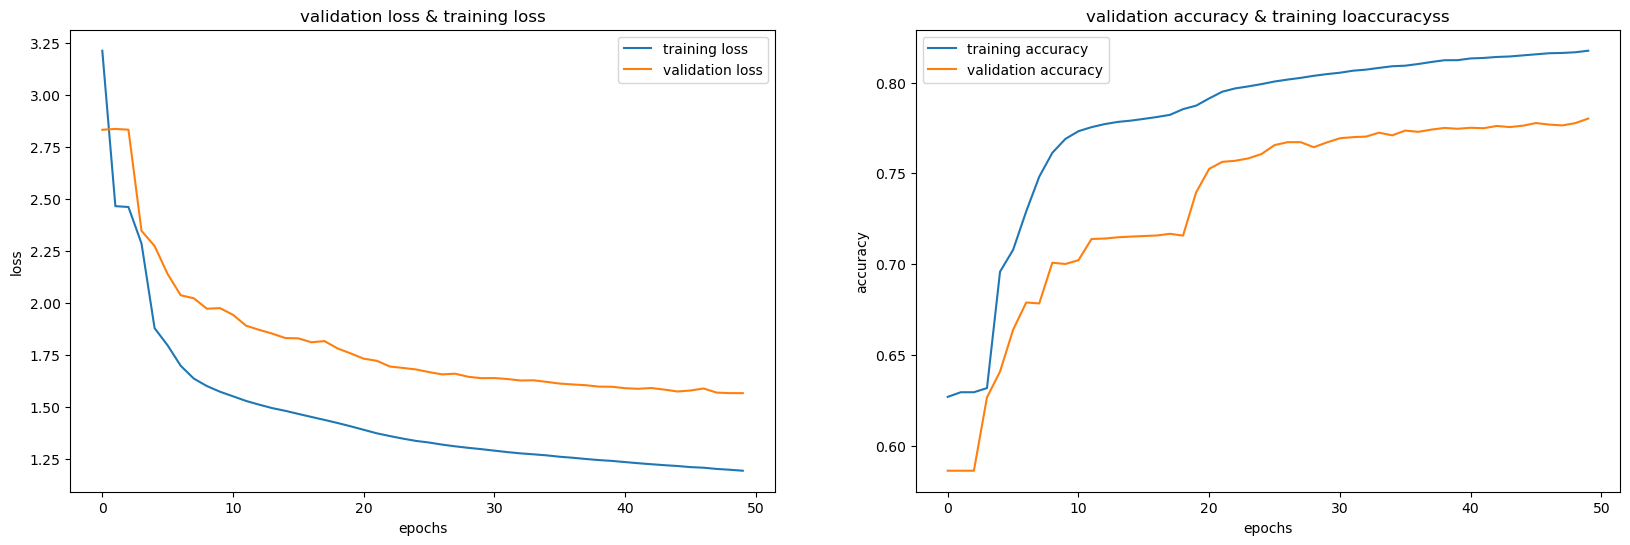

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
# Plot the first subplot  loss)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("validation loss & training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(["training loss", "validation loss"],loc ="upper right"); 

# Plot the second subplot ( accuracy)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("validation accuracy & training loaccuracyss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
leg = plt.legend(["training accuracy", "validation accuracy"],loc ="upper left"); 

plt.show()


In [72]:
# y_pred=model2.predict([spanish_embedded_data, english_teacher_enc])

In [73]:
# y_pred.shape

## Method -2.  ( Attention layer is implemented by using dot products == Luong_Attention)


**Encoder**

In [74]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense

# Define an input sequence and process it.
# encoder_inputs = Input(shape=(None, num_encoder_tokens))
# A_encoder_inputs = Input(shape=(1,),dtype=tf.string, name="english_input")
A_encoder_inputs = Input(shape=(None,), name="english_input")

# A_encoder_vectorizer = spanish_vectorizer(A_encoder_inputs)

# A_enc = layers.Embedding(vocab_size_spanish, embedding_dim, name="en_embedding")(A_encoder_vectorizer)
A_enc = layers.Embedding(vocab_size_english, embedding_dim, name="en_embedding")(A_encoder_inputs)

encoder_outputs, A_enc_state_h, A_enc_state_c = LSTM(latent_dim,  return_sequences=True,return_state=True,
                                   dropout=dropout, recurrent_dropout=dropout, name="encoder")(A_enc)
# We discard `encoder_outputs` and only keep the states.
A_encoder_states = [A_enc_state_h, A_enc_state_c]



**DECODER**

In [75]:
# decoder_inputs = Input(shape=(None,), dtype=tf.int32, name="spanish_teacher")
decoder_inputs = Input(shape=(None,), name="spanish_teacher")

x = layers.Embedding(vocab_size_spanish, embedding_dim
                     ,name="spanish_embedding")(decoder_inputs)
decoder_lstm = layers.LSTM(latent_dim, return_sequences=True, return_state=True,
                           dropout=dropout, recurrent_dropout=dropout, name="Decoder")
decoder_outputs, _, _ = decoder_lstm(x, initial_state=A_encoder_states)


**Attentional part**


In [76]:
attention = layers.dot([decoder_outputs, encoder_outputs], axes=[2,2], name="Attention_score")

**Context vector**


In [77]:
context = layers.dot([attention, encoder_outputs], axes=[2,1], name="Attention_output")
print(context.shape)

(None, None, 64)


**Combine attention with decoder ouput**

In [78]:

decoder_combined_context = layers.concatenate([context, decoder_outputs], name="Luong_Attention")
print(decoder_combined_context.shape)

(None, None, 128)


**Ouput of the model**


In [79]:
ouputs = layers.Dense(vocab_size_spanish, activation='softmax', name="Output")(decoder_combined_context)
print(decoder_outputs.shape)

(None, None, 64)


In [80]:
model3 = Model([A_encoder_inputs, decoder_inputs], ouputs)

In [81]:
model3.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ english_input       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spanish_teacher     │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ en_embedding        │ (None, None, 100) │    220,600 │ english_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spanish_embedding   │ (None, None, 100) │    457,600 │ spanish_teacher[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder (LSTM)      │ [(None, None,     │     42,240 │ en_embedding[0][… │
│                     │ 64), (None, 64),  │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Decoder (LSTM)      │ [(None, None,     │     42,240 │ spanish_embeddin… │
│                     │ 64), (None, 64),  │            │ encoder[0][1],    │
│                     │ (None, 64)]       │            │ encoder[0][2]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_score     │ (None, None,      │          0 │ Decoder[0][0],    │
│ (Dot)               │ None)             │            │ encoder[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_output    │ (None, None, 64)  │          0 │ Attention_score[… │
│ (Dot)               │                   │            │ encoder[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Luong_Attention     │ (None, None, 128) │          0 │ Attention_output… │
│ (Concatenate)       │                   │            │ Decoder[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, None,      │    590,304 │ Luong_Attention[… │
│                     │ 4576)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,352,984 (5.16 MB)

 Trainable params: 1,352,984 (5.16 MB)

 Non-trainable params: 0 (0.00 B)

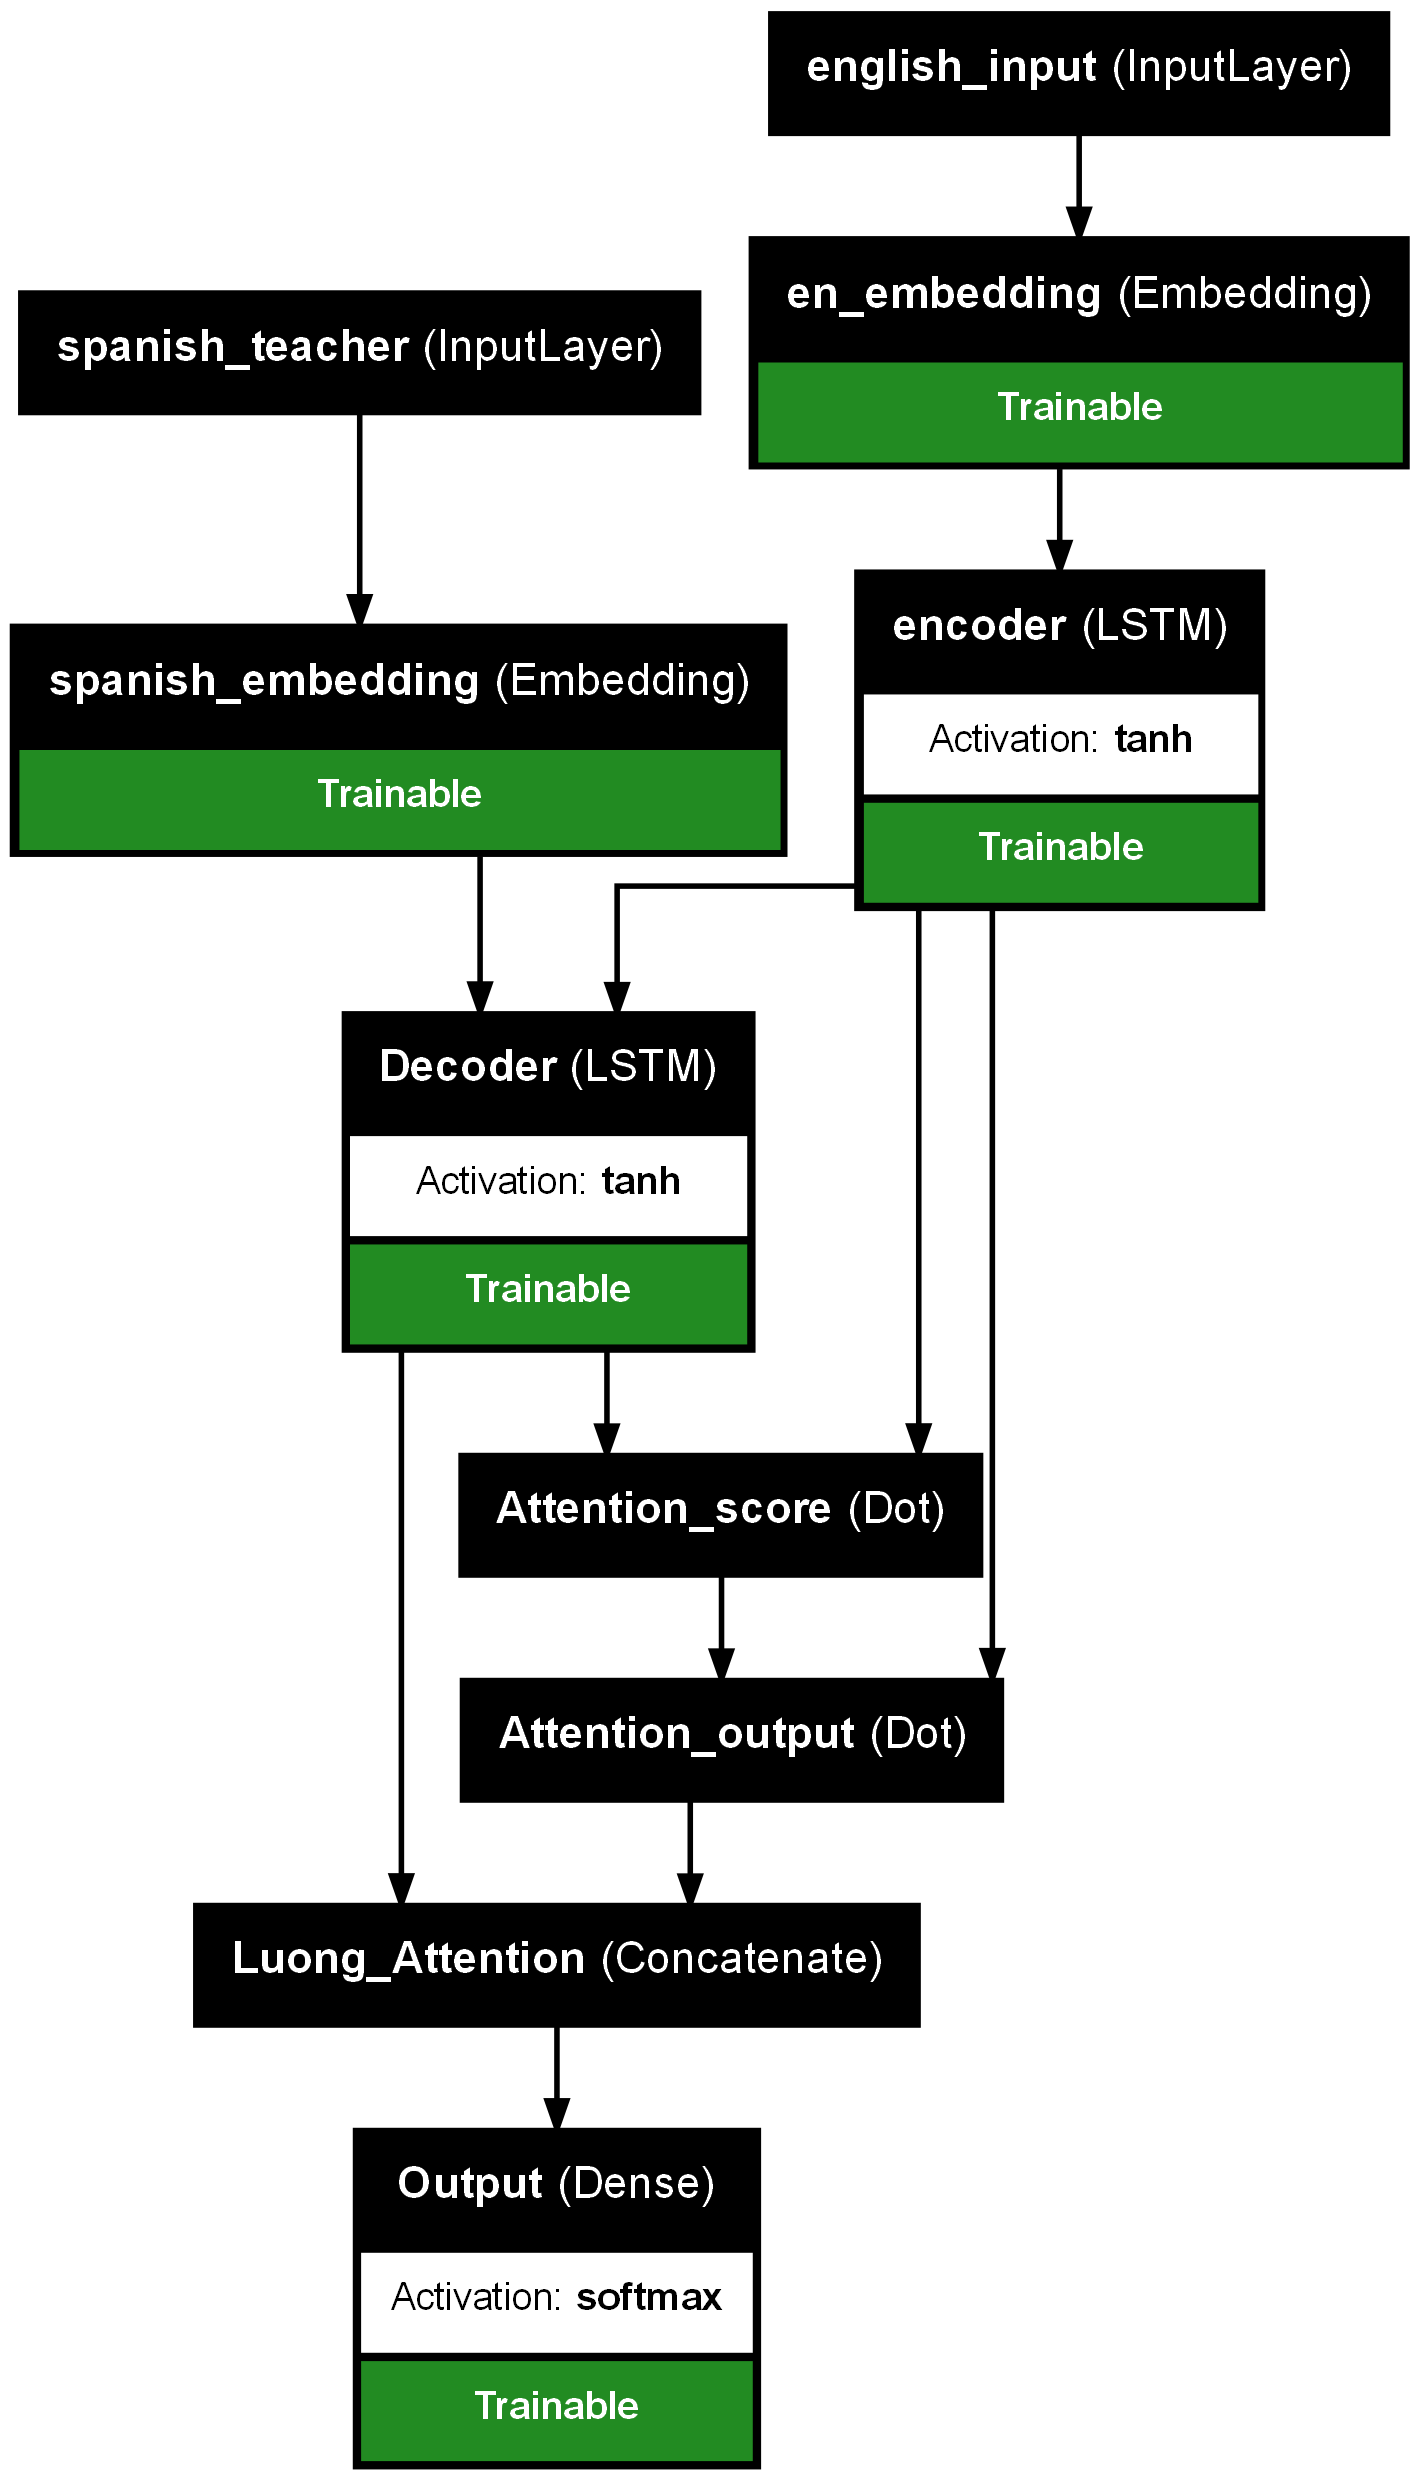

In [82]:
# from tensorflow.keras.utils import plot_model

# plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_layer_names=True)

# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model

# plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_layer_names=True)

plot_model(model3, to_file='model_plot4.png',
    show_shapes=False,
    show_layer_names=True,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True)

In [83]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [84]:
# # Prepare training data with teacher forcing
# # decoder_input_data is a 2D array of shape (None, None) containing a tokenization of the English sentences.
# # decoder_target_data is the same as decoder_input_data but offset by one timestep. decoder_target_data[:, t] will be the same as decoder_input_data[:, t-1].

# english_teacher_enc = english_vectorizer(X_processed_array) #.numpy() # Teacher
# english_target_enc = np.zeros_like(english_teacher_enc)
# english_target_enc[:,:-1] = english_teacher_enc[:,1:] # To predict
# english_target_enc.shape

In [85]:
# Configure the model and start training
# Stop training with early stopping with patience of 20
callbacks_list = [EarlyStopping(monitor='loss', mode='min', min_delta=0.000001,
                                patience=5, restore_best_weights=True, verbose=1,
                                )]


# history = model3.fit([y_processed_array, english_teacher_enc], english_target_enc,
#                     validation_split=0.1,
#                     epochs=50, batch_size=BATCH_SIZE,
#                     callbacks=callbacks_list,
#                     verbose=1)


history = model3.fit([english_embedded_data, spanish_teacher_enc], spanish_target_enc,
                    validation_split=0.1,
                    epochs=50, batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=1)



Epoch 1/50


282/282 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.6301 - loss: 3.0792 - val_accuracy: 0.7358 - val_loss: 1.8738
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.7873 - loss: 1.4712 - val_accuracy: 0.7686 - val_loss: 1.6427
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - accuracy: 0.8084 - loss: 1.3226 - val_accuracy: 0.7747 - val_loss: 1.5696
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.8160 - loss: 1.2352 - val_accuracy: 0.7886 - val_loss: 1.4937
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.8263 - loss: 1.1536 - val_accuracy: 0.7935 - val_loss: 1.4517
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - accuracy: 0.8330 - loss: 1.0883 - val_accuracy: 0.7993 - val_loss: 1.4067
Epoch 7/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8374 - loss: 1.0415 - val_accuracy: 0.8038 - val_loss: 1.3801
Epoch 8/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.8424 - loss: 1.0056 - val_accurac

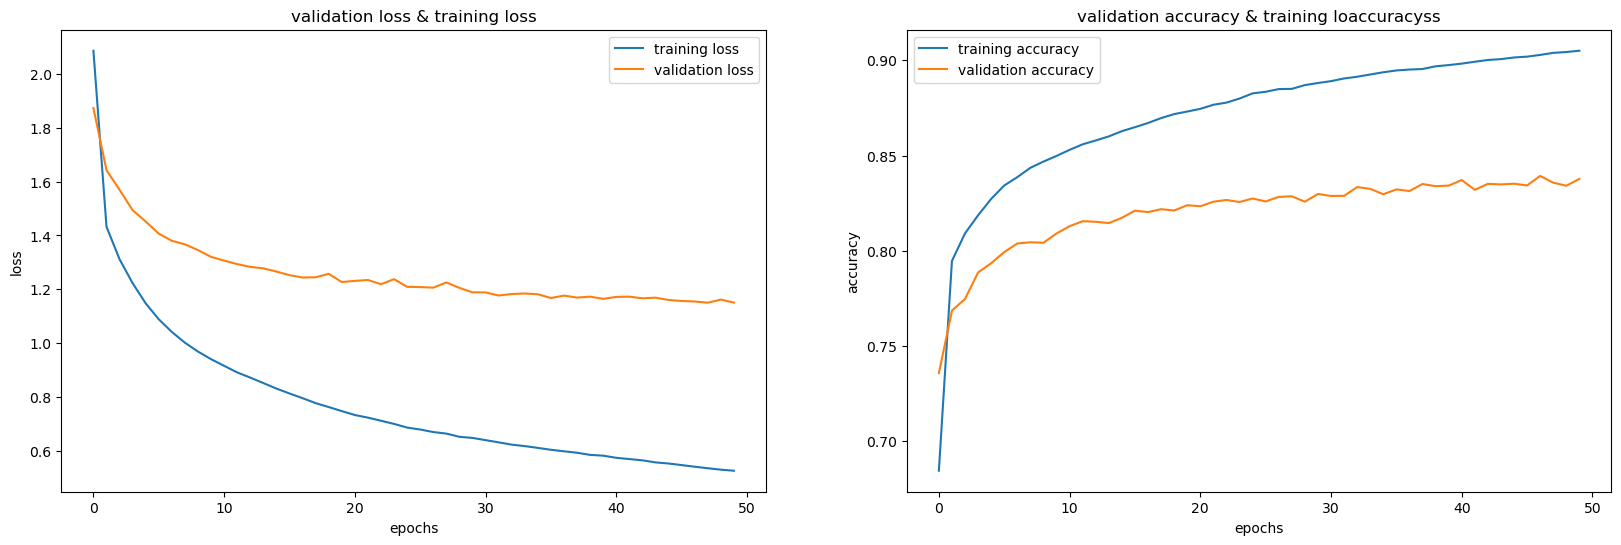

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
# Plot the first subplot  loss)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("validation loss & training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(["training loss", "validation loss"],loc ="upper right"); 

# Plot the second subplot ( accuracy)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("validation accuracy & training loaccuracyss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
leg = plt.legend(["training accuracy", "validation accuracy"],loc ="upper left"); 

plt.show()


# Transformer(  Direct import transformer from keras)

In [87]:
data.head()

,Go.,Ve.,CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #4986655 (cueyayotl)
0,Go.,Vete.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Go.,Vaya.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Go.,Váyase.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Hi.,Hola.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
4,Run!,¡Corre!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


In [88]:
data.columns = ["en", "sp","not_needed"]
data.head(5)

,en,sp,not_needed
0,Go.,Vete.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Go.,Vaya.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Go.,Váyase.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Hi.,Hola.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
4,Run!,¡Corre!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


In [89]:
df = data.iloc[:10000, [0, 1]]
df

,en,sp
0,Go.,Vete.
1,Go.,Vaya.
2,Go.,Váyase.
3,Hi.,Hola.
4,Run!,¡Corre!
...,...,...
9995,I caught an eel.,Cogí una anguila.
9996,I chickened out.,Me acobardé.
9997,I cooked dinner.,Cociné la cena.
9998,I couldn't move.,No me podía mover.


In [90]:
import re
from unicodedata import normalize

def clean_text(text):
    text = normalize('NFD', text.lower())
    text = re.sub('[^A-Za-z ]+', '', text)
    return text

def clean_and_prepare_text(text):
    text = '[start] ' + clean_text(text) + ' [end]'
    return text

df['en'] = df['en'].apply(lambda row: clean_text(row))
df['sp'] = df['sp'].apply(lambda row: clean_and_prepare_text(row))
df.head()

,en,sp
0,go,[start] vete [end]
1,go,[start] vaya [end]
2,go,[start] vayase [end]
3,hi,[start] hola [end]
4,run,[start] corre [end]


In [91]:
en = df['en']
sp = df['sp']

en_max_len = max(len(line.split()) for line in en)
sp_max_len = max(len(line.split()) for line in sp)
sequence_len = max(en_max_len, sp_max_len)

print(f'Max phrase length (English): {en_max_len}')
print(f'Max phrase length (spanish): {sp_max_len}')
print(f'Sequence length: {sequence_len}')

Max phrase length (English): 5
Max phrase length (spanish): 11
Sequence length: 11


In [92]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

en_tokenizer = Tokenizer()
en_tokenizer.fit_on_texts(en)
en_sequences = en_tokenizer.texts_to_sequences(en)
en_x = pad_sequences(en_sequences, maxlen=sequence_len, padding='post')

sp_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@\\^_`{|}~\t\n')
sp_tokenizer.fit_on_texts(sp)
sp_sequences = sp_tokenizer.texts_to_sequences(sp)
sp_y = pad_sequences(sp_sequences, maxlen=sequence_len + 1, padding='post')

In [93]:
en_vocab_size = len(en_tokenizer.word_index) + 1
sp_vocab_size = len(sp_tokenizer.word_index) + 1

print(f'Vocabulary size (English): {en_vocab_size}')
print(f'Vocabulary size (spanish): {sp_vocab_size}')

Vocabulary size (English): 2241
Vocabulary size (spanish): 4570


Finally, create the features and the labels the model will be trained with. The features are the padded English sequences and the padded spanish sequences minus the [end] tokens. The labels are the padded spanish sequences minus the [start] tokens. Package the features in a dictionary so they can be input to a model that accepts multiple inputs.

In [94]:
inputs = { 'encoder_input': en_x, 'decoder_input': sp_y[:, :-1] }
outputs = sp_y[:, 1:]

## Build and train a model

Now use Keras's functional API to define a model that includes a transformer encoder and a transformer decoder. The model accepts two inputs: padded English sequences for the encoder, and padded French sequences for the decoder. The output from the decoder is fed to a softmax output layer for classification.

In [95]:
# !pip install keras_nlp
# import keras_nlp

# print("keras-nlp version:", keras_nlp.__version__)


In [96]:
# import keras_nlp
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import Model
# from tensorflow.keras.layers import Input, Dense, Dropout
# from keras_nlp.layers import TokenAndPositionEmbedding, TransformerEncoder
# from keras_nlp.layers import TransformerDecoder


In [97]:


# np.random.seed(42)
# tf.random.set_seed(42)

# num_heads = 8
# embed_dim = 256

# encoder_input = Input(shape=(None,), dtype='int64', name='encoder_input')
# x = TokenAndPositionEmbedding(en_vocab_size, sequence_len, embed_dim)(encoder_input)
# encoder_output = TransformerEncoder(embed_dim, num_heads)(x)
# encoded_seq_input = Input(shape=(None, embed_dim))

# decoder_input = Input(shape=(None,), dtype='int64', name='decoder_input')
# x = TokenAndPositionEmbedding(sp_vocab_size, sequence_len, embed_dim, mask_zero=True)(decoder_input)
# x = TransformerDecoder(embed_dim, num_heads)(x, encoded_seq_input)
# x = Dropout(0.4)(x)

# decoder_output = Dense(sp_vocab_size, activation='softmax')(x)
# decoder = Model([decoder_input, encoded_seq_input], decoder_output)
# decoder_output = decoder([decoder_input, encoder_output])

# model = Model([encoder_input, decoder_input], decoder_output)
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary(line_length=120)

In [98]:
# from tensorflow.keras.callbacks import EarlyStopping

# callback = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# hist = model.fit(inputs, outputs, epochs=50, validation_split=0.2, callbacks=[callback])

In [99]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 6))
# # Plot the first subplot  loss)
# plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
# plt.plot(hist.history["loss"])
# plt.plot(hist.history["val_loss"])
# plt.title("validation loss & training loss")
# plt.xlabel("epochs")
# plt.ylabel("loss")
# leg = plt.legend(["training loss", "validation loss"],loc ="upper right");

# # Plot the second subplot ( accuracy)
# plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
# plt.plot(hist.history["accuracy"])
# plt.plot(hist.history["val_accuracy"])
# plt.title("validation accuracy & training loaccuracyss")
# plt.xlabel("epochs")
# plt.ylabel("accuracy")
# leg = plt.legend(["training accuracy", "validation accuracy"],loc ="upper left");

# plt.show()


## Use the model to translate text

In [100]:
# def translate_text(text, model, en_tokenizer, sp_tokenizer, sp_index_lookup, sequence_len):
#     input_sequence = en_tokenizer.texts_to_sequences([text])
#     padded_input_sequence = pad_sequences(input_sequence, maxlen=sequence_len, padding='post')
#     decoded_text = '[start]'

#     for i in range(sequence_len):
#         target_sequence = sp_tokenizer.texts_to_sequences([decoded_text])
#         padded_target_sequence = pad_sequences(target_sequence, maxlen=sequence_len, padding='post')[:, :-1]

#         prediction = model([padded_input_sequence, padded_target_sequence])

#         idx = np.argmax(prediction[0, i, :]) - 1
#         token = sp_index_lookup[idx]
#         decoded_text += ' ' + token

#         if token == '[end]':
#             break

#     return decoded_text[8:-6] # Remove [start] and [end] tokens

# sp_vocab = sp_tokenizer.word_index
# sp_index_lookup = dict(zip(range(len(sp_vocab)), sp_vocab))
# texts = en[40000:40010].values

# for text in texts:
#     translated = translate_text(text, model, en_tokenizer, sp_tokenizer, fsp_index_lookup, sequence_len)
#     print(f'{text} => {translated}')

In [101]:
# translate_text('god is god', model, en_tokenizer, sp_tokenizer, sp_index_lookup, sequence_len)


The model isn't perfect, but it's not bad, either. The dataset that you trained with contains just 50,000 samples, but if you trained with millions of samples, you'd have the makings of a decent NMT model.

# Transformer(  build transformer from scratch using keras)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Input, Dropout, LayerNormalization


In [2]:
from tensorflow.keras.metrics import Mean


In [3]:
devices = tf.config.experimental.list_physical_devices("GPU")
for device in devices:
    tf.config.experimental.set_memory_growth(device=device, enable=True)

In [4]:
# # df = pd.read_csv("C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\ppp.csv" )
# df = pd.read_csv("C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\ppp.csv" )

# df.columns = ["en", "fr"]
# df.head(10)

In [5]:
import pandas as pd  # Import pandas library for data manipulation
import re  # Import re library for regular expressions
import unicodedata  # Import unicodedata library for handling Unicode characters

# Load dataset from file
dataset = 'C:/Users/praba\Documents/GitHub/deep_learning_uca_2/spa-eng/spa.txt'
df = pd.read_table(dataset)  # Read data from file into a DataFrame





In [6]:
df

,Go.,Ve.,CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #4986655 (cueyayotl)
0,Go.,Vete.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Go.,Vaya.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Go.,Váyase.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Hi.,Hola.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
4,Run!,¡Corre!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
...,...,...,...
141364,A carbon footprint is the amount of carbon dio...,Una huella de carbono es la cantidad de contam...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
141365,Since there are usually multiple websites on a...,Como suele haber varias páginas web sobre cual...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
141366,"If you want to sound like a native speaker, yo...","Si quieres sonar como un hablante nativo, debe...",CC-BY 2.0 (France) Attribution: tatoeba.org #9...
141367,It may be impossible to get a completely error...,Puede que sea imposible obtener un corpus comp...,CC-BY 2.0 (France) Attribution: tatoeba.org #2...


In [7]:

df.columns = ["en", "fr","not_needed"]
df.head(10)

,en,fr,not_needed
0,Go.,Vete.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Go.,Vaya.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Go.,Váyase.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Hi.,Hola.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
4,Run!,¡Corre!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
5,Run!,¡Corran!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
6,Run!,¡Huye!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
7,Run!,¡Corra!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
8,Run!,¡Corred!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
9,Run.,Corra.,CC-BY 2.0 (France) Attribution: tatoeba.org #4...


In [8]:
df = df.iloc[:, [0, 1]]

In [9]:
df

,en,fr
0,Go.,Vete.
1,Go.,Vaya.
2,Go.,Váyase.
3,Hi.,Hola.
4,Run!,¡Corre!
...,...,...
141364,A carbon footprint is the amount of carbon dio...,Una huella de carbono es la cantidad de contam...
141365,Since there are usually multiple websites on a...,Como suele haber varias páginas web sobre cual...
141366,"If you want to sound like a native speaker, yo...","Si quieres sonar como un hablante nativo, debe..."
141367,It may be impossible to get a completely error...,Puede que sea imposible obtener un corpus comp...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141369 entries, 0 to 141368
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   en      141369 non-null  object
 1   fr      141369 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


In [11]:
df.describe()

,en,fr
count,141369,141369
unique,119661,132830
top,You can put it there.,Estoy quebrado.
freq,68,13


In [12]:
df.isna().sum()

en    0
fr    0
dtype: int64

In [13]:
df.dropna(inplace=True)

C:\Users\praba\AppData\Local\Temp\ipykernel_16680\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [14]:
df.columns.to_list()

['en', 'fr']

In [15]:
df["en"] = df["en"].str.lower()
df["fr"] = df["fr"].str.lower()

C:\Users\praba\AppData\Local\Temp\ipykernel_16680\2720072555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["en"] = df["en"].str.lower()
C:\Users\praba\AppData\Local\Temp\ipykernel_16680\2720072555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fr"] = df["fr"].str.lower()


In [16]:
en_data = df["en"].values
fr_data =df["fr"].values

In [17]:
en_data[:10]

array(['go.', 'go.', 'go.', 'hi.', 'run!', 'run!', 'run!', 'run!', 'run!',
       'run.'], dtype=object)

In [18]:
for i in range(fr_data.shape[0]):
    en_data[i] = "sos " + str(en_data[i]) + " eos"
    fr_data[i] = "sos " + str(fr_data[i]) + " eos"

In [19]:
num_words = 10000
tokenizer_en = Tokenizer(num_words=num_words, filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
tokenizer_en.fit_on_texts(en_data)
englist_sentances = tokenizer_en.texts_to_sequences(en_data)

In [20]:
word_index = tokenizer_en.word_index
print(f"Num words in English: {len(word_index)}")

Num words in English: 13996


In [21]:
tokenizer_fr = Tokenizer(num_words=num_words, filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
tokenizer_fr.fit_on_texts(fr_data)
french_sentences = tokenizer_fr.texts_to_sequences(fr_data)

word_index_fr = tokenizer_fr.word_index
print(f"Num words in French: {len(word_index_fr)}")

Num words in French: 29208


In [22]:
word_index_fr

{'sos': 1,
 'eos': 2,
 'de': 3,
 'que': 4,
 'no': 5,
 'tom': 6,
 'a': 7,
 'la': 8,
 'el': 9,
 'en': 10,
 'es': 11,
 'un': 12,
 'me': 13,
 'se': 14,
 'lo': 15,
 'una': 16,
 'él': 17,
 'por': 18,
 'los': 19,
 'está': 20,
 'mi': 21,
 'con': 22,
 'su': 23,
 'le': 24,
 'mary': 25,
 'para': 26,
 'ella': 27,
 'te': 28,
 'las': 29,
 'y': 30,
 'más': 31,
 'al': 32,
 'qué': 33,
 'yo': 34,
 'eso': 35,
 'tu': 36,
 'estoy': 37,
 'muy': 38,
 'este': 39,
 'esta': 40,
 'tiene': 41,
 'tengo': 42,
 'quiero': 43,
 'aquí': 44,
 'del': 45,
 'estaba': 46,
 'si': 47,
 'hacer': 48,
 'fue': 49,
 'casa': 50,
 '¿qué': 51,
 'como': 52,
 'esto': 53,
 'todo': 54,
 'algo': 55,
 'tiempo': 56,
 'gusta': 57,
 'ha': 58,
 'todos': 59,
 'nada': 60,
 'son': 61,
 'puedo': 62,
 'tan': 63,
 'favor': 64,
 'hay': 65,
 'era': 66,
 'he': 67,
 'ir': 68,
 'bien': 69,
 'mucho': 70,
 'vez': 71,
 '¿por': 72,
 'cuando': 73,
 'sé': 74,
 'puede': 75,
 'nos': 76,
 'ser': 77,
 'creo': 78,
 'solo': 79,
 'nunca': 80,
 'ya': 81,
 'mañana': 82

In [23]:
english_sentences = pad_sequences(englist_sentances, maxlen = 7, padding='post', truncating='post')
french_sentences = pad_sequences(french_sentences, maxlen=7, padding='post', truncating='post')

In [24]:
def get_angles(pos, i, embedding_dim):
    """
    Function to compute the angles for positional encoding.
    
    Returns the angle computed
    """
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(embedding_dim))
    return pos * angle_rates

In [25]:
def positional_encoding(position, embedding_dim):
    """
    Adds  positional encoding to the Embeddings to be fed to the Transformer model.
    
    Computes a sin and cos of the angles determined by the get_angles() function
    and adds the value computed to an axis of the embeddings.
    """
    angle_rads = get_angles(np.arange(position)[:, np.newaxis], 
                           np.arange(embedding_dim)[np.newaxis, :], embedding_dim)
    
    # apply sin to even indices in the array. ie 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    
    # apply cos to odd indices in the array. ie 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

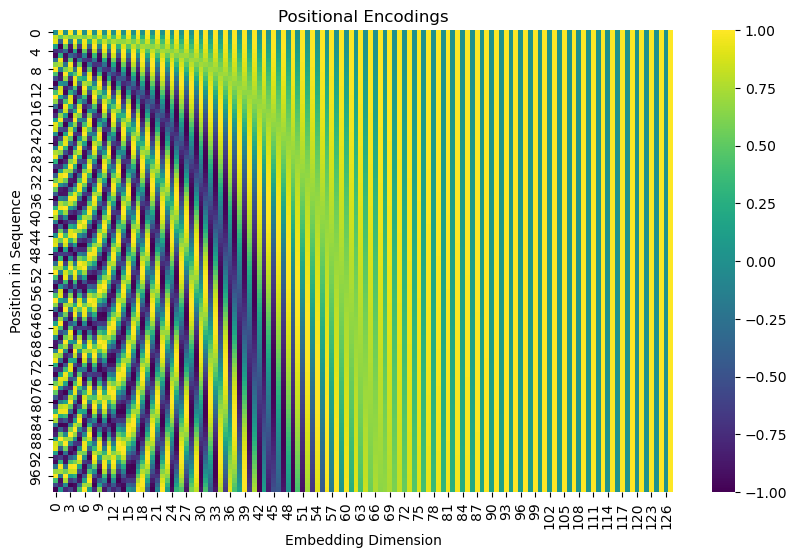

In [26]:
# Generate positional encodings
pos_encodings = positional_encoding(100, 128)

# Visualize the encodings as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pos_encodings[0], cmap='viridis')
plt.xlabel('Embedding Dimension')
plt.ylabel('Position in Sequence')
plt.title('Positional Encodings')
plt.show()

In [27]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

In [28]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [29]:
def create_masks(inputs, targets):
    enc_padding_mask = create_padding_mask(inputs)
    dec_padding_mask = create_padding_mask(inputs)
    look_ahead_mask = create_look_ahead_mask(tf.shape(targets)[1])
    dec_target_padding_mask = create_padding_mask(targets)
    combine_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
    return enc_padding_mask, combine_mask, dec_padding_mask

In [30]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    dk = tf.cast(tf.shape(k)[-1], dtype=tf.float32)
    scaled_dk = tf.math.sqrt(dk)
    scaled_attention_logits = matmul_qk/scaled_dk
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis = -1)
    output = tf.matmul(attention_weights, v)
    return output, attention_weights

In [31]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, key_dim, num_heads, dropout_rate=0.0):
        
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        #  ensure  that the dimension of the embedding can be evenly split across attention heads
        assert key_dim % num_heads == 0 
        self.depth = self.key_dim // self.num_heads
        
        # dense layers to project the input into queries, keys and values
        self.wq = Dense(key_dim)
        self.wk = Dense(key_dim)
        self.wv = Dense(key_dim)
    
        # dropout layer
        self.dropout = Dropout(dropout_rate)
    
        # dense layer to project the output of the attention heads
        self.dense = Dense(key_dim)
        
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
        
    def call(self, v, k, q, mask=None):
        
        batch_size = tf.shape(q)[0]
        
        # Dense on the q, k, v vectors
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        
        # split the heads
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        
        # split the queries, keys and values into multiple heads
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        
        # reshape and add Dense layer
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.key_dim))
        output = self.dense(concat_attention)
        output = self.dropout(output)
        
        return output, attention_weights

In [32]:
def FeedForward(embedding_dim, fully_connected_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(fully_connected_dim, activation='relu'),
        tf.keras.layers.Dense(embedding_dim)
    ])
    return model

In [33]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1):
        """
        A single layer of the encoder in a Transformer model.
        
        Args:
            embedding_dim (int): The dimension of the input embeddings.
            num_heads (int): The number of attention heads in the multi-head attention mechanism.
            fully_connected_dim (int): The dimension of the fully connected feedforward network.
            dropout_rate (float, optional): The dropout rate to be applied. Default is 0.1.
        """
        super(EncoderLayer, self).__init__()
        
        self.mha = MultiHeadAttention(embedding_dim, num_heads, dropout_rate)
        
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        
        # Dropout
        self.dropout = Dropout(dropout_rate)
        
        # Feedforward network
        self.ffn = FeedForward(embedding_dim, fully_connected_dim)
        
    def call(self, x, training, mask):
        """
        Forward pass through the encoder layer.

        Args:
            x (tf.Tensor): The input tensor.
            training (bool): Whether the model is in training mode.
            mask: The mask to be applied in multi-head attention.

        Returns:
            tf.Tensor: The output tensor after passing through the encoder layer.
        """
        
        # Apply multi-head self-attention mechanism to input tensor
        attn_output, _ = self.mha(x, x, x, mask)
        
        # Apply first layer normalization and add residual connection
        out1 = self.layernorm1(attn_output + x)
        
        # Apply feedforward network to output of first layer normalization
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout(ffn_output, training=training)
        
        # Apply second layer normalization and add residual connection
        out2 = self.layernorm2(ffn_output + out1)
        
        return out2

In [34]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, maximum_position_encoding, dropout_rate=0.1):

        """
        Args:
            num_layers (int): The number of encoder layers.
            embedding_dim (int): The dimension of the input embeddings.
            num_heads (int): The number of attention heads in the multi-head attention mechanism.
            fully_connected_dim (int): The dimension of the fully connected feedforward network.
            input_vocab_size (int): The size of the input vocabulary.
            maximum_position_encoding (int): The maximum position for positional encoding.
            dropout_rate (float, optional): The dropout rate to be applied. Default is 0.1.
        """

        super(Encoder, self).__init__()
        
        self.num_layers = num_layers
        self.embedding_dim = embedding_dim
        
        # Embedding layer
        self.embedding = Embedding(input_vocab_size, embedding_dim)
        
        # Positional encoding
        self.pos_encoding = positional_encoding(maximum_position_encoding, embedding_dim)
        
        # Encoder layers
        self.enc_layers = [EncoderLayer(embedding_dim, num_heads, fully_connected_dim, dropout_rate) for _ in range(num_layers)]
        
        # Dropout layer
        self.dropout = Dropout(dropout_rate)
        
    def call(self, inputs, training, mask):

        """
        Forward pass through the encoder.

        Args:
            inputs (tf.Tensor): The input sequence tensor.
            training (bool): Whether the model is in training mode.
            mask: The mask to be applied in multi-head attention.

        Returns:
            tf.Tensor: The encoded sequence tensor.
        """

        # Get the sequence length
        seq_len = tf.shape(inputs)[1]

        # Embed the input sequence
        inputs = self.embedding(inputs)

        # Scale the embeddings by sqrt(embedding_dim)
        inputs *= tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))

        # Add positional encodings to the input sequence
        inputs += self.pos_encoding[:, :seq_len, :]

        # Apply dropout to the input sequence
        inputs = self.dropout(inputs, training=training)

        # Pass the input sequence through the encoder layers
        for i in range(self.num_layers):
            inputs = self.enc_layers[i](inputs, training, mask)

        # Return the encoded sequence
        return inputs

In [35]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1):
        """
        Initializes a single decoder layer of the transformer model.
        
        Args:
            embedding_dim: The dimension of the embedding space.
            num_heads: The number of attention heads to use.
            fully_connected_dim: The dimension of the feedforward network.
            rate: The dropout rate for regularization.
        """
        super(DecoderLayer, self).__init__()
        
        # Instantiate two instances of MultiHeadAttention.
        self.mha1 = MultiHeadAttention(embedding_dim, num_heads, dropout_rate)
        self.mha2 = MultiHeadAttention(embedding_dim, num_heads, dropout_rate)
        
        # Instantiate a fully connected feedforward network.
        self.ffn = FeedForward(embedding_dim, fully_connected_dim)
        
        # Instantiate three layer normalization layers with epsilon=1e-6.
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.layernorm3 = LayerNormalization(epsilon=1e-6)
        
        # Instantiate a dropout layer for regularization.
        self.dropout3 = Dropout(dropout_rate)
        
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):

        """
        Forward pass through the decoder layer.

        Args:
            x (tf.Tensor): The input tensor.
            enc_output (tf.Tensor): The output from the encoder layer.
            training (bool): Whether the model is in training mode.
            look_ahead_mask: The mask for look-ahead in multi-head attention.
            padding_mask: The mask for padding in multi-head attention.

        Returns:
            tf.Tensor: The output tensor after passing through the decoder layer.
            tf.Tensor: The attention weights for the first multi-head attention.
            tf.Tensor: The attention weights for the second multi-head attention.
        """
        
        # Apply the first multi-head attention layer to the query vector x.
        # We pass x as all three inputs to the layer because this is a self-attention layer.
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        
        # Add the original input to the output of the attention layer and apply layer normalization.
        out1 = self.layernorm1(attn1 + x) 
        
        # Apply the second multi-head attention layer to the output from the first layer and the encoder output.
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        
        # Add the output from the first layer to the output of the second layer and apply layer normalization.
        out2 = self.layernorm2(attn2 + out1)
        
        # Apply the feedforward network to the output of the second layer and apply dropout regularization.
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        
        # Add the output from the second layer to the output of the feedforward network and apply layer normalization.
        out3 = self.layernorm3(ffn_output + out2)
        
        return out3, attn_weights_block1, attn_weights_block2

In [36]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, target_vocab_size, maximum_position_encoding, dropout_rate=0.1):

        """
        The decoder component of a Transformer model.
    
        Args:
            num_layers (int): The number of decoder layers.
            embedding_dim (int): The dimension of the input embeddings.
            num_heads (int): The number of attention heads to use.
            fully_connected_dim (int): The dimension of the feedforward network.
            target_vocab_size (int): The size of the target vocabulary.
            maximum_position_encoding (int): The maximum position for positional encoding.
            dropout_rate (float, optional): The dropout rate for regularization. Default is 0.1.
        """

        super(Decoder, self).__init__()
        
        self.num_layers = num_layers
        self.embedding_dim = embedding_dim
        
        # create layers
        self.embedding = Embedding(target_vocab_size, embedding_dim)
        self.pos_encoding = positional_encoding(maximum_position_encoding, embedding_dim)
        self.dec_layers = [DecoderLayer(embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1) for _ in range(num_layers)]
        self.dropout = Dropout(dropout_rate)
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):

        """
        Forward pass through the decoder.

        Args:
            x (tf.Tensor): The input sequence tensor.
            enc_output (tf.Tensor): The output from the encoder layer.
            training (bool): Whether the model is in training mode.
            look_ahead_mask: The mask for look-ahead in multi-head attention.
            padding_mask: The mask for padding in multi-head attention.

        Returns:
            tf.Tensor: The decoded sequence tensor.
            dict: Dictionary containing attention weights for each decoder layer.
        """
        
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        # add embedding and positional encoding
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)

        # apply each layer of the decoder
        for i in range(self.num_layers):
            # pass through decoder layer i
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            # record attention weights for block1 and block2
            attention_weights[f"decoder_layer{i + 1}_block1"] = block1
            attention_weights[f"decoder_layer{i + 1}_block2"] = block2

        return x, attention_weights

In [37]:
class Transformer(tf.keras.Model):
    
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, target_vocab_size, max_positional_encoding_input, max_positional_encoding_target, dropout_rate=0.1):
        
        """
        The Transformer model.

        Args:
            num_layers (int): The number of layers in the encoder and decoder.
            embedding_dim (int): The dimension of the input embeddings.
            num_heads (int): The number of attention heads to use.
            fully_connected_dim (int): The dimension of the feedforward network.
            input_vocab_size (int): The size of the input vocabulary.
            target_vocab_size (int): The size of the target vocabulary.
            max_positional_encoding_input (int): The maximum positional encoding for the input.
            max_positional_encoding_target (int): The maximum positional encoding for the target.
            dropout_rate (float, optional): The dropout rate for regularization. Default is 0.1.
        """

        super(Transformer, self).__init__()
        
        # Initialize the Encoder and Decoder layers
        self.encoder = Encoder(num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, max_positional_encoding_input, dropout_rate)
        self.decoder = Decoder(num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, max_positional_encoding_target, dropout_rate)
        
        # Add a final dense layer to make the final prediction
        self.final_layer = tf.keras.layers.Dense(target_vocab_size, activation='softmax')
        
    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):

        """
        Forward pass through the Transformer.

        Args:
            inp (tf.Tensor): The input sequence tensor.
            tar (tf.Tensor): The target sequence tensor.
            training (bool): Whether the model is in training mode.
            enc_padding_mask: The mask for padding in the encoder.
            look_ahead_mask: The mask for look-ahead in the decoder.
            dec_padding_mask: The mask for padding in the decoder.

        Returns:
            tf.Tensor: The final prediction tensor.
            dict: Dictionary containing attention weights from the decoder.
        """

        # Pass the input sequence through the Encoder
        enc_output = self.encoder(inp, training, enc_padding_mask)
        
        # Pass the target sequence and the output of the Encoder through the Decoder
        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)
        
        # Pass the output of the Decoder through the final dense layer to get the final prediction
        final_output = self.final_layer(dec_output)
        
        return final_output, attention_weights

In [38]:
# Set hyperparameters for the Transformer model
embedding_dim = 256  # dimensionality of the embeddings used for tokens in the input and target sequences
fully_connected_dim = 512  # dimensionality of the hidden layer of the feedforward neural network within the Transformer block
num_layers = 4  # number of Transformer blocks in the encoder and decoder stacks
num_heads = 8  # number of heads in the multi-head attention mechanism
dropout_rate = 0.1  # dropout rate for regularization

# Set vocabulary sizes for input and target sequences
input_vocab_size = len(tokenizer_fr.word_index) + 2  # add 2 for the start and end tokens
target_vocab_size = len(tokenizer_en.word_index) + 2  # add 2 for the start and end tokens

# Set maximum positional encoding values for input and target sequences
max_positional_encoding_input = input_vocab_size  # maximum positional encoding value for input sequence
max_positional_encoding_target = target_vocab_size  # maximum positional encoding value for target sequence

# Set the number of epochs and batch size for training
EPOCHS = 50
batch_size = 512

In [39]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, embedding_dim, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.embedding_dim = tf.cast(embedding_dim, dtype=tf.float32)
        self.warmup_steps = tf.cast(warmup_steps, dtype=tf.float32)

    def __call__(self, step):
        
        step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.embedding_dim) * tf.math.minimum(arg1, arg2)

# Create an instance of the custom learning rate schedule
learning_rate = CustomSchedule(embedding_dim)

In [40]:
transformer = Transformer(num_layers, embedding_dim, num_heads,
                           fully_connected_dim, input_vocab_size, target_vocab_size, 
                           max_positional_encoding_input, max_positional_encoding_target, dropout_rate)

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2 = 0.98, epsilon = 1e-9)

# Define the loss object
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

In [41]:

def loss_function(true_values, predictions):
    """
    Calculate the loss value for a given target sequence.

    Args:
        true_values (tf.Tensor): The true target sequence.
        predictions (tf.Tensor): The predicted target sequence.

    Returns:
        float: The loss value for the given target sequence.
    """
    # Create a mask to exclude the padding tokens
    mask = tf.math.logical_not(tf.math.equal(true_values, 0))

    # Compute the loss value using the loss object
    loss_ = loss_object(true_values, predictions)

    # Apply the mask to exclude the padding tokens
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    # Calculate the mean loss value
    return tf.reduce_sum(loss_) / tf.reduce_sum(mask)

def accuracy_function(true_values, predictions):
    """
    Calculate the accuracy for a given target sequence.

    Args:
        true_values (tf.Tensor): The true target sequence.
        predictions (tf.Tensor): The predicted target sequence.

    Returns:
        float: The accuracy value for the given target sequence.
    """
    # Compute the accuracies using the true and predicted target sequences
    accuracies = tf.equal(true_values, tf.argmax(predictions, axis=2))

    # Create a mask to exclude the padding tokens
    mask = tf.math.logical_not(tf.math.equal(true_values, 0))

    # Apply the mask to exclude the padding tokens from the accuracies
    accuracies = tf.math.logical_and(mask, accuracies)
    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)

    # Calculate the mean accuracy value
    return tf.reduce_sum(accuracies) / tf.reduce_sum(mask)

# Define the training metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

In [42]:
train_step_signature = [
    tf.TensorSpec(shape=(batch_size, 30), dtype=tf.int64),
    tf.TensorSpec(shape=(batch_size,30), dtype=tf.int64),
]

In [43]:
@tf.function()
def train_step(encoder_input, target):
    """
    Function to perform a single training step.

    Args:
    encoder_input (tf.Tensor): The input tensor for the encoder.
    target (tf.Tensor): The target tensor for the decoder.

    Returns:
    None.
    """

    # Slice the target tensor to get the input for the decoder
    decoder_input = target[:, :-1]

    # Slice the target tensor to get the expected output of the decoder
    expected_output = target[:, 1:]

    # Create masks for the encoder input, decoder input and the padding
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, decoder_input)

    # Perform a forward pass through the model
    with tf.GradientTape() as tape:
        predictions, _ = transformer(encoder_input, decoder_input, True, enc_padding_mask, combined_mask, dec_padding_mask)

        # Calculate the loss between the predicted output and the expected output
        loss = loss_function(expected_output, predictions)

    # Calculate gradients and update the model parameters
    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    # Update the training loss and accuracy metrics
    train_loss(loss)
    train_accuracy(expected_output, predictions)

In [44]:
train_loss

<Mean name=train_loss>

In [45]:
print(type(train_loss))


<class 'keras.src.metrics.reduction_metrics.Mean'>


In [46]:
train_accuracy

<SparseCategoricalAccuracy name=train_accuracy>

In [47]:
EPOCHS = 20

In [50]:
# for epoch in range(0, EPOCHS+1):
for epoch in range(0, EPOCHS+1):

    # Reset the metrics at the start of the next epoch
    # train_loss.reset_states()
    train_loss.reset_state()
    # train_accuracy.reset_states()
    train_accuracy.reset_state()

    current_batch_index = 0

    # iterate through the dataset in batches of batch_size
    for i in range(int(len(english_sentences)/batch_size)):
        # get the input and target batch
        input_batch = tf.convert_to_tensor(np.array(english_sentences[current_batch_index:current_batch_index+batch_size]),dtype=tf.int64)
        target_batch = tf.convert_to_tensor(np.array(french_sentences[current_batch_index:current_batch_index+batch_size]),dtype=tf.int64)

        current_batch_index = current_batch_index + batch_size
        # call the train_step function to train the model using the current batch
        train_step(input_batch, target_batch)

    # print the epoch loss and accuracy after iterating through the dataset
    print (f'Epoch {epoch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

ValueError: in user code:

    File "C:\Users\praba\AppData\Local\Temp\ipykernel_16680\2701326999.py", line 25, in train_step  *
        predictions, _ = transformer(encoder_input, decoder_input, True, enc_padding_mask, combined_mask, dec_padding_mask)
    File "c:\Users\praba\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 123, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\praba\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 723, in __call__
        raise ValueError(

    ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: True (of type <class 'bool'>)


In [216]:
tf.keras.metrics.Mean.reset_states()


AttributeError: type object 'Mean' has no attribute 'reset_states'

In [146]:
transformer.summary()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Encoder)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Decoder)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# save model
# save tokenizer
transformer.save("transformer")

INFO:tensorflow:Assets written to: transformer\assets


INFO:tensorflow:Assets written to: transformer\assets


In [ ]:
transformer.load_weights("C:\\Users\\praba\\Downloads\\transformer\\variables\\variables")

In [ ]:
.data-00000-of-00001

In [ ]:
# Converting the input sequence to a tensor
text = "hi how are you"
text = "sos " + text.lower() + " eos"
inp_seq = pad_sequences(tokenizer_en.texts_to_sequences([text]), maxlen=10, padding='post')
out_seq = tf.convert_to_tensor([[tokenizer_fr.word_index["sos"]]])
# Creating a mask for the input sequence
enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp_seq, out_seq)
# # Creating a mask for the output sequence
output_tokens = []
# # Looping until the maximum length of the output sequence is reached or the <end> token is generated
for i in range(100):
    # Calling the Transformer model on the input and output sequences and masks
    output, attn_weights = transformer(inp_seq, out_seq, False, enc_padding_mask, combined_mask, dec_padding_mask)
    # Getting the last token from the output sequence
    last_token = output[:, -1:, :]
    # Getting the token with the highest probability from the last token
    predicted_token = tf.cast(tf.argmax(last_token, axis=-1), tf.int32)
    # Checking if the predicted token is the <end> token
    if predicted_token == tokenizer_fr.word_index["eos"]:
        break
    # Appending the predicted token to the output tokens list
    output_tokens.append(predicted_token[0][0].numpy())
    # Concatenating the predicted token to the output sequence
    out_seq = tf.concat([out_seq, predicted_token], axis=-1)
    # Updating the mask for the output sequence
    decoder_padding_mask, look_ahead_mask = create_padding_mask(out_seq), create_look_ahead_mask(tf.shape(out_seq)[1])
    combined_mask = tf.maximum(decoder_padding_mask, look_ahead_mask)
# Converting the output tokens list to a tensor
output_tokens = tf.convert_to_tensor([output_tokens])
# Detokenizing and decoding the output tokens to get the translation
# translation = tokenizer_fr.sequences_to_texts(output_tokens)[0]

In [ ]:
tokenizer_fr.sequences_to_texts(output_tokens.numpy())

['hola ¿cómo estás']

In [ ]:
tokenizer_en.sequences_to_texts(inp_seq)

['sos hi how are you eos']

In [2]:
import tensorflow as tf
# import keras

print("TensorFlow version:", tf.__version__)
# print("Keras version:", keras.__version__)


TensorFlow version: 2.17.0-dev20240229


In [2]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
# print("Keras version:", tf.keras.__version__)


TensorFlow version: 2.17.0-dev20240229


In [3]:
import tensorflow.keras 


AttributeError: module 'tensorflow._api.v2.compat.v2.__internal__' has no attribute 'register_load_context_function'